<a href="https://colab.research.google.com/github/puneat/QuantAnalysis/blob/main/soyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/puneat/QuantAnalysis.git

!cp /content/QuantAnalysis/soybean.py .

Cloning into 'QuantAnalysis'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 44 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (44/44), done.


In [2]:
import pandas as pd
import numpy as np
from pandas import datetime
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from datetime import datetime
import soybean

import statsmodels.api as sm
from statsmodels.tsa import arima_model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
zs_15 = soybean.soybean('15M','1S', expiry=False)
print('done 15')
# zs_15 = soybean('15M','1S')
# print('done 15M')
# zs_30 = soybean('30M','1S')
# print('done 30M')
zs_60 = soybean.soybean('60M','1S', expiry=False)
print('done 60M')

done 15
done 60M


In [ ]:
zl_1D = soybean('1D','1BO')
print('done 1D')
zl_60 = soybean('60M','1BO')
print('done 60M')
zl_30 = soybean('30M','1BO')
print('done 30M')
zl_15 = soybean('15M','1BO')
print('done 15M')

done 1D
done 60M
done 30M
done 15M


In [ ]:
zm_1D = soybean('1D','1SM')
print('done 1D')
zm_60 = soybean('60M','1SM')
print('done 60M')
zm_30 = soybean('30M','1SM')
print('done 30M')
zm_15 = soybean('15M','1SM')
print('done 15M')

done 1D
done 60M
done 30M
done 15M


In [6]:
day_hours = zs_60.c1.between_time('14:00:00', '19:00:00')
night_hours = zs_60.c1.between_time('19:00:01', '13:59:59')

In [11]:
day_h = day_hours.High
day_l = day_hours.Low
day_r = day_h - day_l

night_h = night_hours.High
night_l = night_hours.Low
night_r = night_h - night_l

print('Night Average Range: ', round(night_r.mean(),3))
print('Night Maximum Range: ', night_r.max())
print('Night Range STD: ', round(night_r.std(),3))
print('')
print('Day Average Range: ', round(day_r.mean(),3))
print('Day Maximum Range: ', day_r.max())
print('Day Range STD: ', round(day_r.std(),3))

Night Average Range:  2.278
Night Maximum Range:  14.75
Night Range STD:  1.666

Day Average Range:  3.778
Day Maximum Range:  32.25
Day Range STD:  2.726


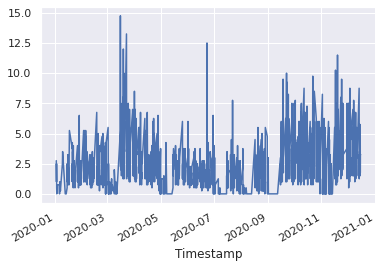

In [8]:
night_r.plot()

In [9]:
day_r.plot()

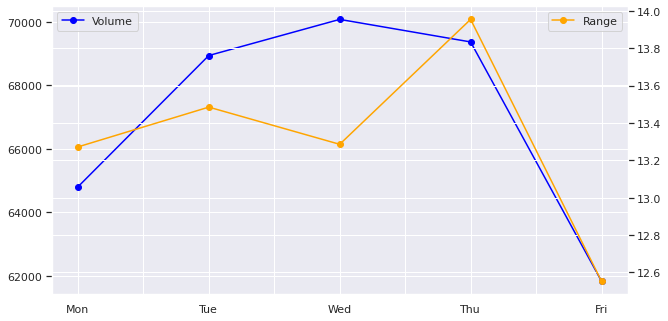

In [ ]:
hl = zs_1D.c1.High-zs_1D.c1.Low
fig = plt.figure(figsize=[8,4])
ax = fig.add_axes([0,0,1,1])
ax1 = ax.twinx()
ax.plot(range, zs_1D.c1.Volume.groupby([zs_1D.c1.Volume.index.weekday]).mean().values ,'-o', color='blue', label='Volume')
ax1.plot(range, hl.groupby([hl.index.weekday]).mean().values, '-o', color='orange', label='Range')
ax.set_xticklabels(['','Mon','','Tue','','Wed','','Thu','','Fri'])
ax.legend(loc='upper left')
ax1.legend(loc='upper right')
plt.show()

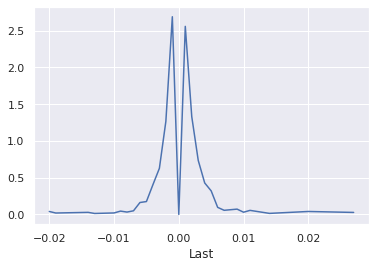

In [ ]:
abs(round(zs_15.c1.Last.pct_change(),3).groupby(round(zs_15.c1.Last.pct_change(),3)).sum()).plot()

In [ ]:
def rsi_ind(df, n, val='Last'):
  delta = df[val].diff()
  dUp, dDown = delta.copy(), delta.copy()
  dUp[dUp < 0] = 0
  dDown[dDown > 0] = 0
  RolUp = dUp.rolling(n).mean()
  RolDown = dDown.rolling(n).mean().abs()

  RS = RolUp / RolDown
  rsi= 100.0 - (100.0 / (1.0 + RS))
  return rsi

zs_rsi = rsi_ind(zs_1D.c1,14)

In [ ]:
zs_rsi = rsi_ind(zs_1D.c1,14)
zm_rsi = rsi_ind(zm_1D.c1,14)
zl_rsi = rsi_ind(zl_1D.c1,14)

fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])
ax1 = ax.twinx()
loc=90
ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("20-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y',alpha=0.3)
ax.set_xticks([datetime.strptime("01-01-2020", '%d-%m-%Y'),
               datetime.strptime("01-02-2020", '%d-%m-%Y'),
               datetime.strptime("01-03-2020", '%d-%m-%Y'),
               datetime.strptime("01-04-2020", '%d-%m-%Y'),
               datetime.strptime("01-05-2020", '%d-%m-%Y'),
               datetime.strptime("01-06-2020", '%d-%m-%Y'),
               datetime.strptime("01-07-2020", '%d-%m-%Y'),
               datetime.strptime("01-08-2020", '%d-%m-%Y'),
               datetime.strptime("01-09-2020", '%d-%m-%Y'),
               datetime.strptime("01-10-2020", '%d-%m-%Y'),
               datetime.strptime("01-11-2020", '%d-%m-%Y'),
               datetime.strptime("01-12-2020", '%d-%m-%Y')])

ax.set_xticklabels(['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'X')
ax.text(datetime.strptime("15-11-2020", '%d-%m-%Y'),loc,'F')

ax.plot(zs_rsi.index, zs_rsi.groupby([zs_rsi.index.date]).mean(), label='ZS', linewidth=2)
ax1.plot(zs_1D.c1.Last.index, zs_1D.c1.Last.groupby([zs_1D.c1.Last.index.date]).mean(), label='Last', linewidth=2, color='red')
# ax.plot(zm_rsi.index, zm_rsi.groupby([zm_rsi.index.date]).mean(), label='ZM', linewidth=2)
# ax.plot(zl_rsi.index, zl_rsi.groupby([zl_rsi.index.date]).mean(), label='ZL', linewidth=2)

ax.plot(zs_rsi.index, [70]*len(zs_rsi),'--', color='black')
ax.plot(zs_rsi.index, [30]*len(zs_rsi),'--', color='black')

ax.legend(loc='upper center')
ax.set_title('Daily RSI')
ax.set_xlabel('Time')
ax.set_ylabel('Strength')
plt.show()

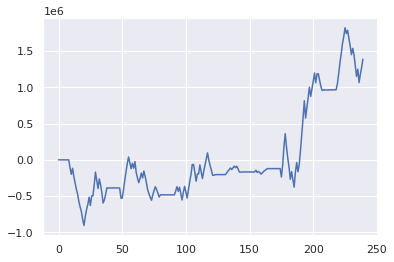

In [ ]:
df={'close':zs_1D.c1.Last,
    'volume':zs_1D.c1.Volume
}
df = pd.DataFrame(df)
lol = np.where(df['close'] > df['close'].shift(1), df['volume'], 
np.where(df['close'] < df['close'].shift(1), -df['volume'], 0)).cumsum()
plt.plot(lol)

In [ ]:
!pip3 install ta

  Created wheel for ta: filename=ta-0.7.0-cp36-none-any.whl size=28718 sha256=08a25d5dadd0a9f4a56d1448781284e5c5129c03cb39b7300d2bd423a13db86b
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta


In [ ]:
import ta
lol = ta.volume.AccDistIndexIndicator(zs_1D.c1.High, zs_1D.c1.Low, zs_1D.c1.Last, zs_1D.c1.Volume)

In [ ]:
pd.concat([lol.acc_dist_index().diff().groupby(lol.acc_dist_index().index.month).mean(),zs_1D.c1.Last.diff().groupby(zs_1D.c1.index.month).mean()], axis=1).corr()

adi      Last
adi   1.000000  0.642328
Last  0.642328  1.000000

In [ ]:
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])
ax1 = ax.twinx()
loc=90
# ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
# ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
# ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
# ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
# ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
# ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
# ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
# ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("20-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y',alpha=0.3)
# ax.set_xticks([datetime.strptime("01-01-2020", '%d-%m-%Y'),
#                datetime.strptime("01-02-2020", '%d-%m-%Y'),
#                datetime.strptime("01-03-2020", '%d-%m-%Y'),
#                datetime.strptime("01-04-2020", '%d-%m-%Y'),
#                datetime.strptime("01-05-2020", '%d-%m-%Y'),
#                datetime.strptime("01-06-2020", '%d-%m-%Y'),
#                datetime.strptime("01-07-2020", '%d-%m-%Y'),
#                datetime.strptime("01-08-2020", '%d-%m-%Y'),
#                datetime.strptime("01-09-2020", '%d-%m-%Y'),
#                datetime.strptime("01-10-2020", '%d-%m-%Y'),
#                datetime.strptime("01-11-2020", '%d-%m-%Y'),
#                datetime.strptime("01-12-2020", '%d-%m-%Y')])

# ax.set_xticklabels(['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

# ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
# ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
# ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
# ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
# ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
# ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
# ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'X')
# ax.text(datetime.strptime("15-11-2020", '%d-%m-%Y'),loc,'F')

ax.plot(lol.acc_dist_index().diff().groupby(lol.acc_dist_index().index.month).mean(), label='ZS', linewidth=2)
ax1.plot(zs_1D.c1.Last.groupby([zs_1D.c1.Last.index.date]).mean().diff().groupby(zs_1D.c1.index.month).mean(), label='Last', linewidth=2, color='red')
# ax.plot(zm_rsi.index, zm_rsi.groupby([zm_rsi.index.date]).mean(), label='ZM', linewidth=2)
# ax.plot(zl_rsi.index, zl_rsi.groupby([zl_rsi.index.date]).mean(), label='ZL', linewidth=2)

# ax.plot(zs_rsi.index, [70]*len(zs_rsi),'--', color='black')
# ax.plot(zs_rsi.index, [30]*len(zs_rsi),'--', color='black')


ax.legend(loc='upper center')
ax.set_title('Daily RSI')
ax.set_xlabel('Time')
ax.set_ylabel('Strength')
plt.show()

In [ ]:
!pip3 install investpy

     |████████████████████████████████| 4.4MB 5.5MB/s 
     |████████████████████████████████| 245kB 42.6MB/s 
     |████████████████████████████████| 5.5MB 31.0MB/s 
     |████████████████████████████████| 512kB 40.8MB/s 
  Created wheel for investpy: filename=investpy-1.0.2-cp36-none-any.whl size=4466765 sha256=aaf1430a114093119d0f762b6bab0df63d2510c12bd17e9abceff5275d763b41
  Stored in directory: /root/.cache/pip/wheels/a3/36/72/713ce416550c4edcd337b819c6dc3aeabe60bfcf6b463065c8
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


In [ ]:
import investpy

rfi = investpy.get_bond_historical_data(bond='U.S. 10Y', from_date='01/01/2020', to_date='31/12/2020')
spot = pd.read_csv('cash_price_mgex_nsi.csv')
spot.index=pd.to_datetime(spot.Date)

In [ ]:
us_soy = investpy.get_commodity_historical_data(commodity='Us soybeans', from_date='01/01/2020', to_date='31/12/2020')
# us_soy.index=pd.to_datetime(us_soy.Date)
def add_expiry(df):
      df['Expiry_first'] = 'F'
      df['Expiry_last'] = 'F'
      expiry_S = ['F','H','K','N','Q','U','X','F','H']
      expiry_dates_S = ['2020-01-15','2020-03-15','2020-05-15','2020-07-15','2020-08-15','2020-09-15','2020-11-15']
      start = 0; end = 0
      for i in range(0,len(df)):
        for key in range(6,-1,-1):
          if df.index[i] <= pd.Timestamp(expiry_dates_S[key]):
            df.iloc[i,-2] = expiry_S[key+start]
            df.iloc[i,-1] = expiry_S[key+end]
      return df

us_soy = add_expiry(us_soy)

In [ ]:
fut = us_soy
expiry_S = ['F','H','K','N','Q','U','X']
expiry_dates_S = ['2020-01-15','2020-03-15','2020-05-15','2020-07-15','2020-08-15','2020-09-15','2020-11-15']
for i, sym in enumerate(fut.Expiry_first):
  for j, exp in enumerate(expiry_S):
    if exp == sym:
      fut.iloc[i,6]= datetime.strptime(expiry_dates_S[j], "%Y-%m-%d").timetuple().tm_yday

In [ ]:
df = {'spot':spot.Cents,
     'exp':fut.Expiry_first,
     'out':fut.Close,
      'rfi':rfi.Close,
      'high':fut.High,
      'low':fut.Low}
df = pd.DataFrame(df)
df = df.dropna(how='any')
assert df.isnull().sum().any()==0
df['t']=0

In [ ]:
for i in range(0, df.shape[0]):
  sdate = df.index[i].dayofyear
  if sdate>320:
    df['t'][i] = (365+df.exp[i]) - sdate
  else:
    df['t'][i] = df.exp[i] - sdate

df = df[(df.t != 0)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
t = df.t.values
spot = df.spot.values
f = df.out.values
r = df.rfi.values

In [ ]:
from sympy import symbols, solve
ans=np.zeros(len(df))
for i in range(0,len(df)):
  x = symbols('x')
  expr = ((365/t[i])*np.log(f[i]/spot[i]))-(r[i]/100)-x
  ans[i] = solve(expr)[0]

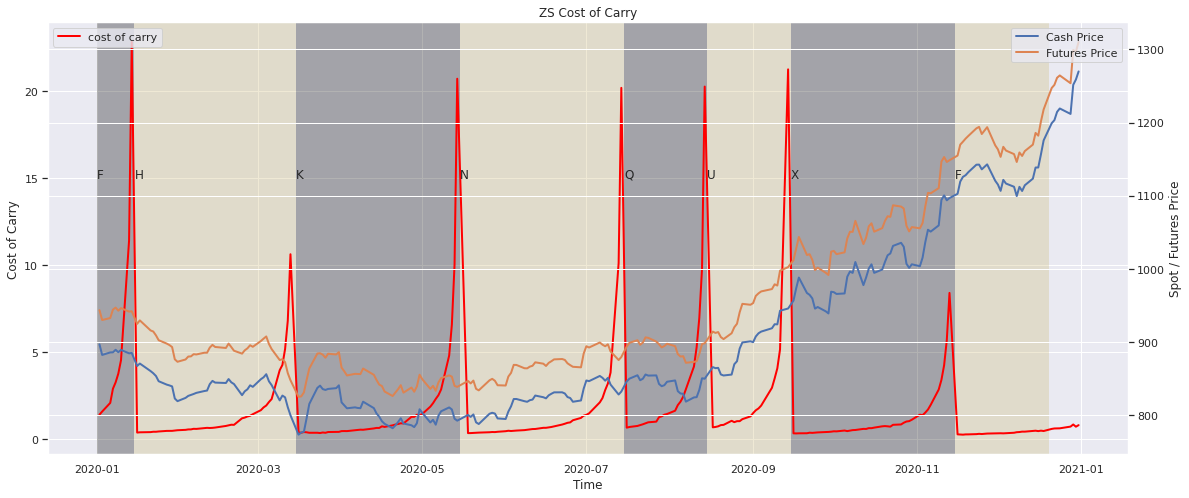

In [ ]:
loc = 15
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])

ax1 = ax.twinx()
# ax.plot((s0).index,(s0), color='green', label='(C1_C2) Spread')
# ax.plot((s1).index,(s1), color='red', label='(C2_C3) Spread')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("20-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y',alpha=0.3)
ax.set_xticks([datetime.strptime("01-01-2020", '%d-%m-%Y'),
               datetime.strptime("01-02-2020", '%d-%m-%Y'),
               datetime.strptime("01-03-2020", '%d-%m-%Y'),
               datetime.strptime("01-04-2020", '%d-%m-%Y'),
               datetime.strptime("01-05-2020", '%d-%m-%Y'),
               datetime.strptime("01-06-2020", '%d-%m-%Y'),
               datetime.strptime("01-07-2020", '%d-%m-%Y'),
               datetime.strptime("01-08-2020", '%d-%m-%Y'),
               datetime.strptime("01-09-2020", '%d-%m-%Y'),
               datetime.strptime("01-10-2020", '%d-%m-%Y'),
               datetime.strptime("01-11-2020", '%d-%m-%Y'),
               datetime.strptime("01-12-2020", '%d-%m-%Y')])

ax.set_xticklabels(['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

# ax.bar((fly_range).index,(fly_range), color='black',label='Butterfly', width=2, edgecolor='black')

ax.plot(df.index, ans, label='cost of carry', color='red', linewidth=2)
ax1.plot(df.index, df.spot, label='Cash Price', linewidth=2)
ax1.plot(df.index, df.out, label='Futures Price', linewidth=2)
# ax.plot(new.index, new.c2c3, color='blue', label='C2_C3 Spread', linewidth=1)

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'X')
ax.text(datetime.strptime("15-11-2020", '%d-%m-%Y'),loc,'F')

ax.legend(loc='upper left')
ax1.legend(loc='upper right')
ax.set_title('ZS Cost of Carry')
ax.set_xlabel('Time')
ax.set_ylabel('Cost of Carry')
ax1.set_ylabel('Spot / Futures Price')
plt.show()

In [ ]:
loc = -44
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])

ax1 = ax.twinx()
# ax.plot((s0).index,(s0), color='green', label='(C1_C2) Spread')
# ax.plot((s1).index,(s1), color='red', label='(C2_C3) Spread')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("20-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y',alpha=0.3)
ax.set_xticks([datetime.strptime("01-01-2020", '%d-%m-%Y'),
               datetime.strptime("01-02-2020", '%d-%m-%Y'),
               datetime.strptime("01-03-2020", '%d-%m-%Y'),
               datetime.strptime("01-04-2020", '%d-%m-%Y'),
               datetime.strptime("01-05-2020", '%d-%m-%Y'),
               datetime.strptime("01-06-2020", '%d-%m-%Y'),
               datetime.strptime("01-07-2020", '%d-%m-%Y'),
               datetime.strptime("01-08-2020", '%d-%m-%Y'),
               datetime.strptime("01-09-2020", '%d-%m-%Y'),
               datetime.strptime("01-10-2020", '%d-%m-%Y'),
               datetime.strptime("01-11-2020", '%d-%m-%Y'),
               datetime.strptime("01-12-2020", '%d-%m-%Y')])

ax.set_xticklabels(['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

# ax.bar((fly_range).index,(fly_range), color='black',label='Butterfly', width=2, edgecolor='black')

ax.plot(df.index, (df.spot-df.out).rolling(7).mean(), label='Basis', color='red', linewidth=2)
ax1.plot(df.index, df.spot, label='Cash Price', linewidth=1)
ax1.plot(df.index, df.out, label='Futures Price', linewidth=1)
# ax.plot(new.index, new.c2c3, color='blue', label='C2_C3 Spread', linewidth=1)

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'X')
ax.text(datetime.strptime("15-11-2020", '%d-%m-%Y'),loc,'F')

ax.legend(loc='upper left')
ax1.legend(loc='upper right')
ax.set_title('ZS Basis')
ax.set_xlabel('Time')
ax.set_ylabel('Basis (Under)')
ax1.set_ylabel('Spot / Futures Price')
plt.show()

In [ ]:
pd.concat([pd.DataFrame(ans,index=df.index),zs_1D.c1.Volume.groupby(zs_1D.c1.index.date).mean()],axis=1).dropna().corr()

0    Volume
0       1.000000 -0.456769
Volume -0.456769  1.000000

In [ ]:
pd.concat([pd.DataFrame(ans,index=df.index),(df.high-df.low).pct_change()],axis=1).dropna().corr()

0         0
0  1.000000 -0.064366
0 -0.064366  1.000000

In [ ]:
pd.concat([us_soy.Close,zs_1D.c1.Last],axis=1).dropna().corr()

Close      Last
Close  1.000000  0.996392
Last   0.996392  1.000000

In [ ]:
lol={'COC':ans,
     'Fut': (df.high-df.low).values}
lol = pd.DataFrame(lol)
lol.corr()

COC      Fut
COC  1.00000 -0.09009
Fut -0.09009  1.00000

In [ ]:
(df.high-df.low).pct_change().plot()

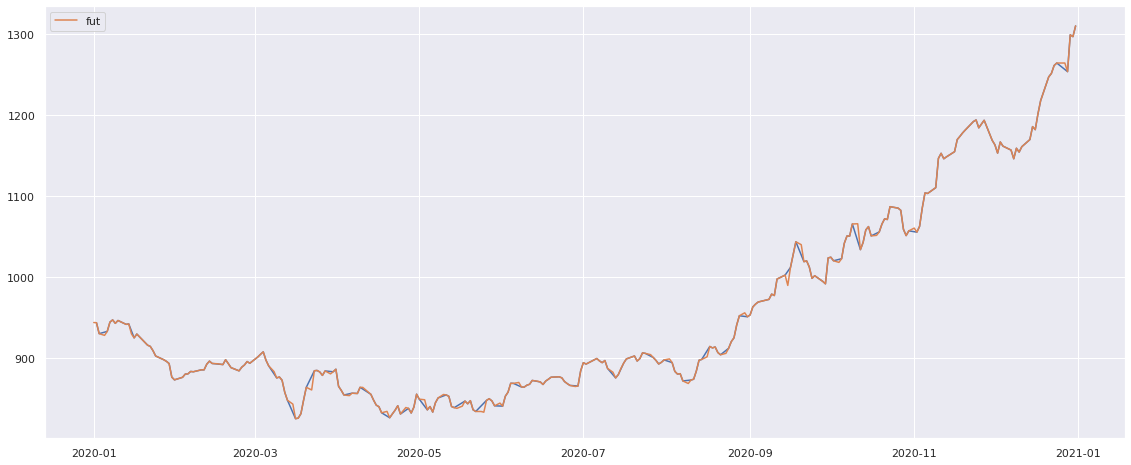

In [ ]:
key=np.zeros(len(df))
for i in range(0,len(df)):
  key[i]= spot[i] * np.exp((r[i]+ans[i]) * (t[i]/365))

fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])
ax.plot(df.index, key)
ax.plot(us_soy.index, us_soy.Close, label='fut')
ax.legend()
plt.show()

In [ ]:
c1c2 = zs_15.c1_c2_spread.Last
c2c3 = zs_15.c2_c3_spread.Last

d = {'c1c2':c1c2,
     'c2c3':c2c3}

new = pd.DataFrame(d)

new = new.dropna(how='any')
assert new.isnull().sum().any()==0

diff = new.c1c2 - new.c2c3

fly_range = diff.groupby([diff.index.date]).max() - diff.groupby([diff.index.date]).min()

loc = 15
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])

# ax1 = ax.twinx()
# ax.plot((s0).index,(s0), color='green', label='(C1_C2) Spread')
# ax.plot((s1).index,(s1), color='red', label='(C2_C3) Spread')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("20-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y',alpha=0.3)
ax.set_xticks([datetime.strptime("01-01-2020", '%d-%m-%Y'),
               datetime.strptime("01-02-2020", '%d-%m-%Y'),
               datetime.strptime("01-03-2020", '%d-%m-%Y'),
               datetime.strptime("01-04-2020", '%d-%m-%Y'),
               datetime.strptime("01-05-2020", '%d-%m-%Y'),
               datetime.strptime("01-06-2020", '%d-%m-%Y'),
               datetime.strptime("01-07-2020", '%d-%m-%Y'),
               datetime.strptime("01-08-2020", '%d-%m-%Y'),
               datetime.strptime("01-09-2020", '%d-%m-%Y'),
               datetime.strptime("01-10-2020", '%d-%m-%Y'),
               datetime.strptime("01-11-2020", '%d-%m-%Y'),
               datetime.strptime("01-12-2020", '%d-%m-%Y')])

ax.set_xticklabels(['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

ax.bar((fly_range).index,(fly_range), color='black',label='Butterfly', width=2, edgecolor='black')

ax.plot(new.index, new.c1c2, color='red', label='C1_C2 Spread', linewidth=1)
ax.plot(new.index, new.c2c3, color='blue', label='C2_C3 Spread', linewidth=1)

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'X')
ax.text(datetime.strptime("15-11-2020", '%d-%m-%Y'),loc,'F')

ax.legend(loc='upper center')
ax.set_title('ZS Daily Butterfly High-Low Range')
ax.set_xlabel('Time')
ax.set_ylabel('Range')
plt.show()

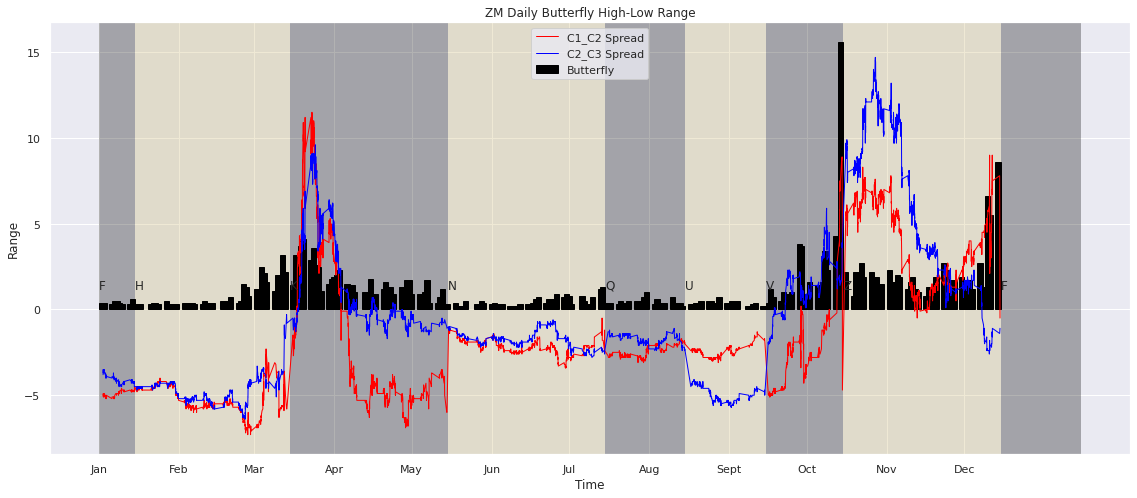

In [ ]:
c1c2 = zm_15.c1_c2_spread.Last
c2c3 = zm_15.c2_c3_spread.Last

d = {'c1c2':c1c2,
     'c2c3':c2c3}
new = pd.DataFrame(d)

new = new.dropna(how='any')
assert new.isnull().sum().any()==0

diff = new.c1c2 - new.c2c3

fly_range = diff.groupby([diff.index.date]).max() - diff.groupby([diff.index.date]).min()

loc = 1.2
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])

# ax1 = ax.twinx()
# ax.plot((s0).index,(s0), color='green', label='(C1_C2) Spread')
# ax.plot((s1).index,(s1), color='red', label='(C2_C3) Spread')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-10-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-10-2020", '%d-%m-%Y'), datetime.strptime("15-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-12-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='black', alpha=0.3)

ax.set_xticks([datetime.strptime("01-01-2020", '%d-%m-%Y'),
               datetime.strptime("01-02-2020", '%d-%m-%Y'),
               datetime.strptime("01-03-2020", '%d-%m-%Y'),
               datetime.strptime("01-04-2020", '%d-%m-%Y'),
               datetime.strptime("01-05-2020", '%d-%m-%Y'),
               datetime.strptime("01-06-2020", '%d-%m-%Y'),
               datetime.strptime("01-07-2020", '%d-%m-%Y'),
               datetime.strptime("01-08-2020", '%d-%m-%Y'),
               datetime.strptime("01-09-2020", '%d-%m-%Y'),
               datetime.strptime("01-10-2020", '%d-%m-%Y'),
               datetime.strptime("01-11-2020", '%d-%m-%Y'),
               datetime.strptime("01-12-2020", '%d-%m-%Y')])

ax.set_xticklabels(['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

ax.bar((fly_range).index,(fly_range), color='black',label='Butterfly', width=2, edgecolor='black')

ax.plot(new.index, new.c1c2, color='red', label='C1_C2 Spread', linewidth=1)
ax.plot(new.index, new.c2c3, color='blue', label='C2_C3 Spread', linewidth=1)


ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'V')
ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'Z')
ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')

ax.legend(loc='upper center')
ax.set_title('ZM Daily Butterfly High-Low Range')
ax.set_xlabel('Time')
ax.set_ylabel('Range')
plt.show()

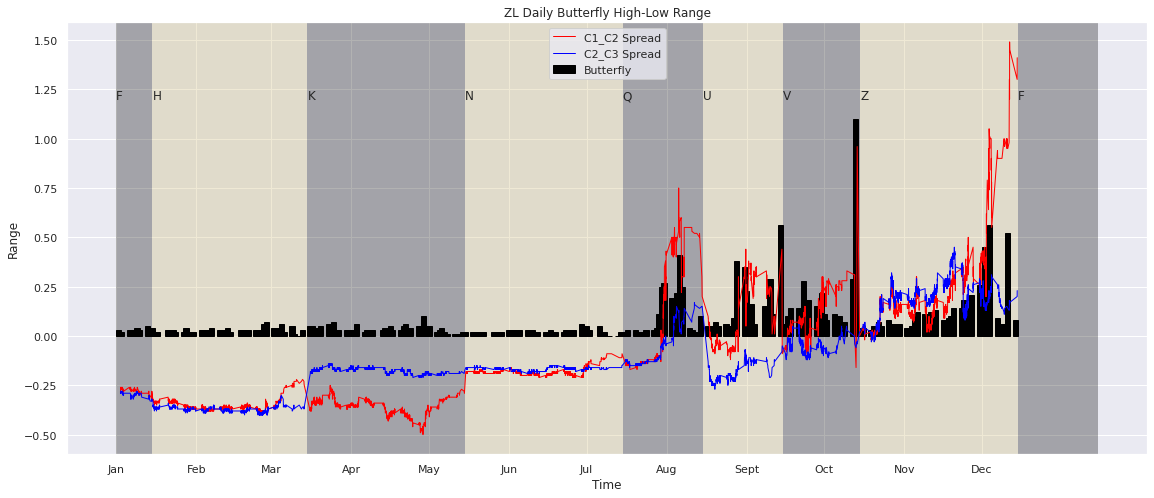

In [ ]:
c1c2 = zl_15.c1_c2_spread.Last
c2c3 = zl_15.c2_c3_spread.Last

d = {'c1c2':c1c2,
     'c2c3':c2c3}
new = pd.DataFrame(d)

new = new.dropna(how='any')
assert new.isnull().sum().any()==0

diff = new.c1c2 - new.c2c3

fly_range = diff.groupby([diff.index.date]).max() - diff.groupby([diff.index.date]).min()

loc = 1.2
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])

# ax1 = ax.twinx()
# ax.plot((s0).index,(s0), color='green', label='(C1_C2) Spread')
# ax.plot((s1).index,(s1), color='red', label='(C2_C3) Spread')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-10-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-10-2020", '%d-%m-%Y'), datetime.strptime("15-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-12-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='black', alpha=0.3)

ax.set_xticks([datetime.strptime("01-01-2020", '%d-%m-%Y'),
               datetime.strptime("01-02-2020", '%d-%m-%Y'),
               datetime.strptime("01-03-2020", '%d-%m-%Y'),
               datetime.strptime("01-04-2020", '%d-%m-%Y'),
               datetime.strptime("01-05-2020", '%d-%m-%Y'),
               datetime.strptime("01-06-2020", '%d-%m-%Y'),
               datetime.strptime("01-07-2020", '%d-%m-%Y'),
               datetime.strptime("01-08-2020", '%d-%m-%Y'),
               datetime.strptime("01-09-2020", '%d-%m-%Y'),
               datetime.strptime("01-10-2020", '%d-%m-%Y'),
               datetime.strptime("01-11-2020", '%d-%m-%Y'),
               datetime.strptime("01-12-2020", '%d-%m-%Y')])

ax.set_xticklabels(['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

ax.bar((fly_range).index,(fly_range), color='black',label='Butterfly', width=2, edgecolor='black')

ax.plot(new.index, new.c1c2, color='red', label='C1_C2 Spread', linewidth=1)
ax.plot(new.index, new.c2c3, color='blue', label='C2_C3 Spread', linewidth=1)


ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'V')
ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'Z')
ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')

ax.legend(loc='upper center')
ax.set_title('ZL Daily Butterfly High-Low Range')
ax.set_xlabel('Time')
ax.set_ylabel('Range')
plt.show()

In [ ]:
import scipy
x = range(1,len(zs_1D.c1.Last)+1)
y = zs_1D.c1.Last.values

from scipy.optimize import curve_fit

def func(t, a, b):
    return a * np.exp(b * t)

popt, pcov = curve_fit(func, x, y)

plt.figure()
plt.plot(x, y, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

TypeError: ignored

In [ ]:
!pip3 install hmmlearn

     |████████████████████████████████| 368kB 11.8MB/s 


In [ ]:
from hmmlearn.hmm import GaussianHMM

zs = zs_15.c1.High - zs_15.c1.Low
zs_train = zs.groupby([(zs.index.month),(zs.index.hour)]).sum()
train = np.column_stack([zs_train])

hmm_model = GaussianHMM(n_components=2, covariance_type="full", n_iter=5000).fit(train)

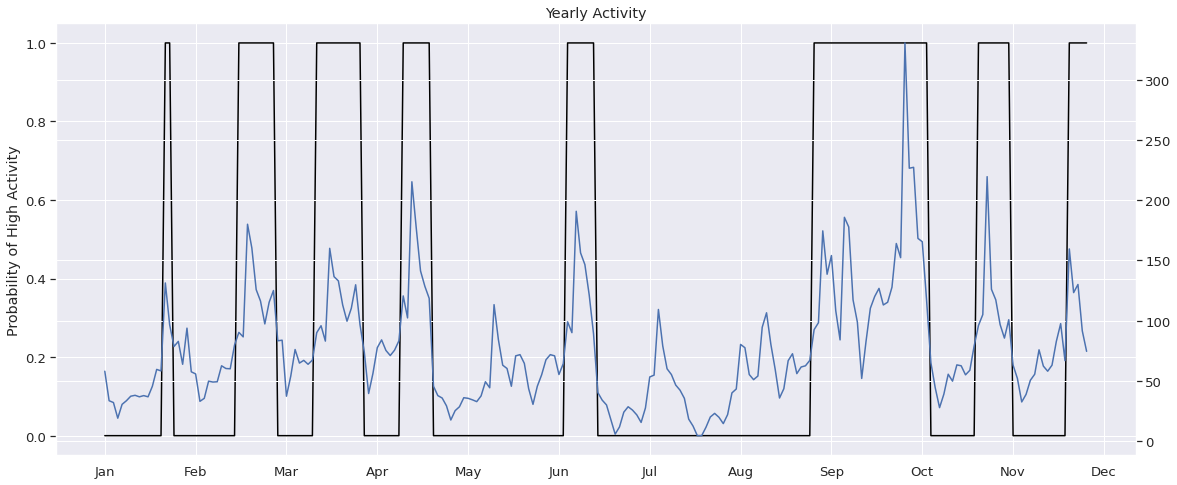

In [ ]:
res = hmm_model.predict(train)
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])
ax1 = ax.twinx()
ax.plot(res, color='black')
ax1.plot(zs_train.values)

ax.set_xticks(list(range(0,252,21)))
ax.set_xticklabels([datetime(2020,_,1).strftime('%b') for _ in range(1,13)])
ax.set_title('Yearly Activity')
ax.set_ylabel('Probability of High Activity')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels import regression
from statsmodels.sandbox.regression.predstd import wls_prediction_std

gpm = (2.2*zm_60.c1.Last)+(11*zl_60.c1.Last)-zs_60.c1.Last

x = pd.DataFrame(gpm.loc[zs_60.c1.index.values]).dropna()
y = pd.DataFrame(zs_60.c1.Last.loc[x.index.values])
x = sm.add_constant(x)
model = regression.linear_model.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Last   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1432.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          3.46e-259
Time:                        19:30:15   Log-Likelihood:                -18684.
No. Observations:                3191   AIC:                         3.737e+04
Df Residuals:                    3189   BIC:                         3.738e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        698.9911      6.347    110.138      0.0

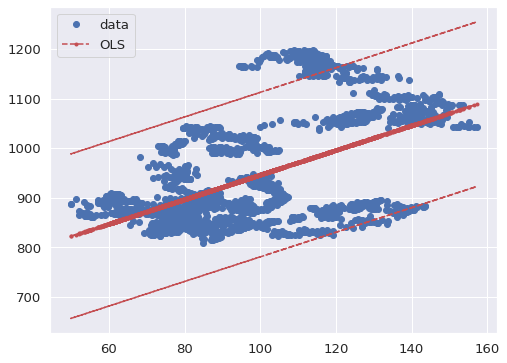

In [ ]:
prstd, iv_l, iv_u = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x.Last, y, 'o', label="data")
# ax.plot(x, y, 'o', label="data")
ax.plot(x.Last, model.fittedvalues, 'r--.', label="OLS")
ax.plot(x.Last, iv_u, 'r--')
ax.plot(x.Last, iv_l, 'r--')
ax.legend(loc='best');

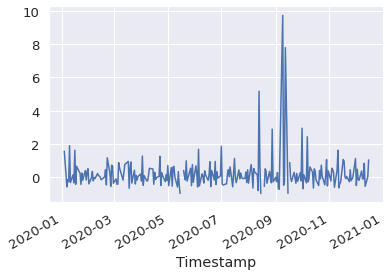

In [ ]:
zs_range.pct_change().dropna().plot()

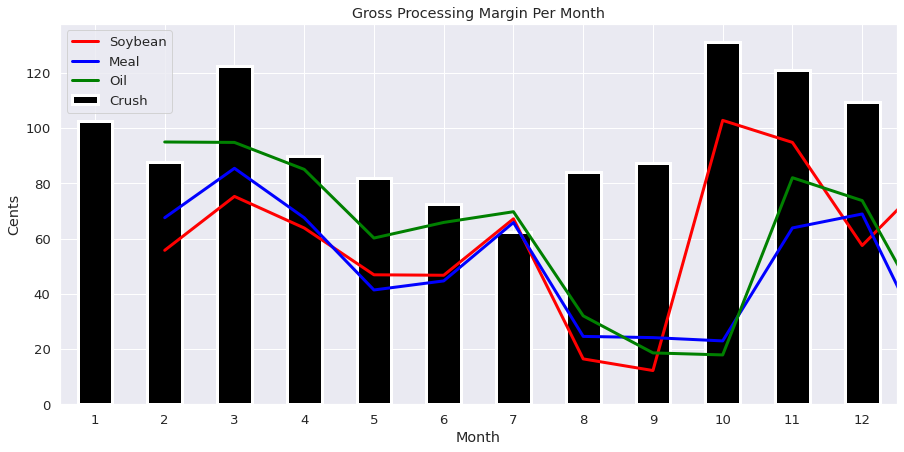

In [ ]:
zs_r = zs_15.c1.High - zs_15.c1.Low
zm_r = zm_15.c1.High - zm_15.c1.Low
zl_r = zl_15.c1.High - zl_15.c1.Low

gpm = (2.2*zm_15.c1.Last) + (11*zl_15.c1.Last) - zs_15.c1.Last

fig, ax = plt.subplots(1, figsize=(15,7))

gpm.groupby(gpm.index.month).mean().plot(color='black', linewidth=3, kind='bar', label='Crush')
(zs_15.c1.Volume.groupby(zs_15.c1.Volume.index.month).mean()/20).plot(color='red', linewidth=3, label='Soybean')
(zm_15.c1.Volume.groupby(zm_15.c1.Volume.index.month).mean()/10).plot(color='blue', linewidth=3, label='Meal')
(zl_15.c1.Volume.groupby(zl_15.c1.Volume.index.month).mean()/10).plot(color='green', linewidth=3, label='Oil')
ax.legend()
ax.set_ylabel('Cents')
ax.set_xlabel('Month')
ax.set_title('Gross Processing Margin Per Month')
plt.show()

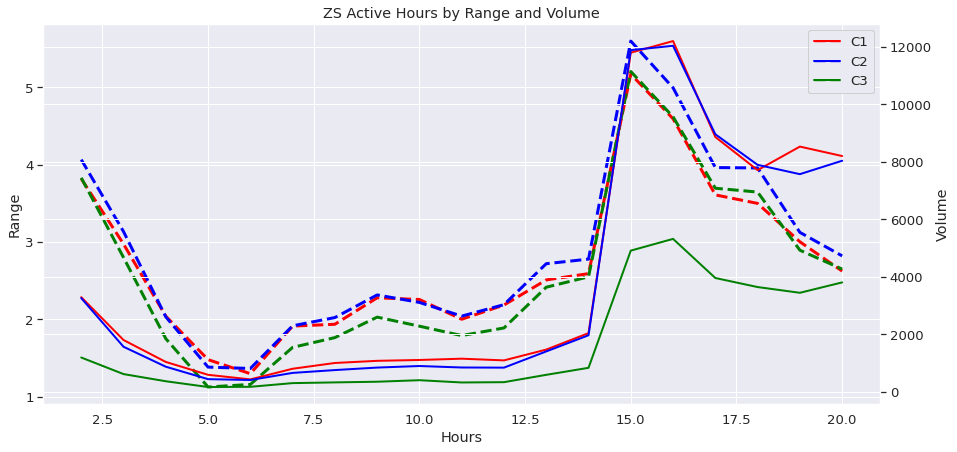

In [ ]:
zr_1 = zs_60.c1.High - zs_60.c1.Low
zr_2 = zs_60.c2.High - zs_60.c2.Low
zr_3 = zs_60.c3.High - zs_60.c3.Low

zv_1 = zs_60.c1.Volume
zv_2 = zs_60.c2.Volume
zv_3 = zs_60.c3.Volume

fig, ax = plt.subplots(1, figsize=(15,7))
ax1=ax.twinx()

ax.plot((zr_1.groupby(zr_1.index.hour).mean()), '--', color='red', linewidth=3, label='C1')
ax.plot((zr_2.groupby(zr_2.index.hour).mean()), '--', color='blue', linewidth=3, label='C2')
ax.plot((zr_3.groupby(zr_3.index.hour).mean()), '--', color='green', linewidth=3, label='C3')

ax1.plot((zv_1.groupby(zv_1.index.hour).mean()), color='red', linewidth=2, label='C1')
ax1.plot((zv_2.groupby(zv_2.index.hour).mean()), color='blue', linewidth=2, label='C2')
ax1.plot((zv_3.groupby(zv_3.index.hour).mean()), color='green', linewidth=2, label='C3')

ax1.legend()
ax.legend()

ax.set_ylabel('Range')

ax1.set_ylabel('Volume')

ax.set_xlabel('Hours')
ax.set_title('ZS Active Hours by Range and Volume')
# ax.set_xticklabels(range(1,20,2))
plt.show()

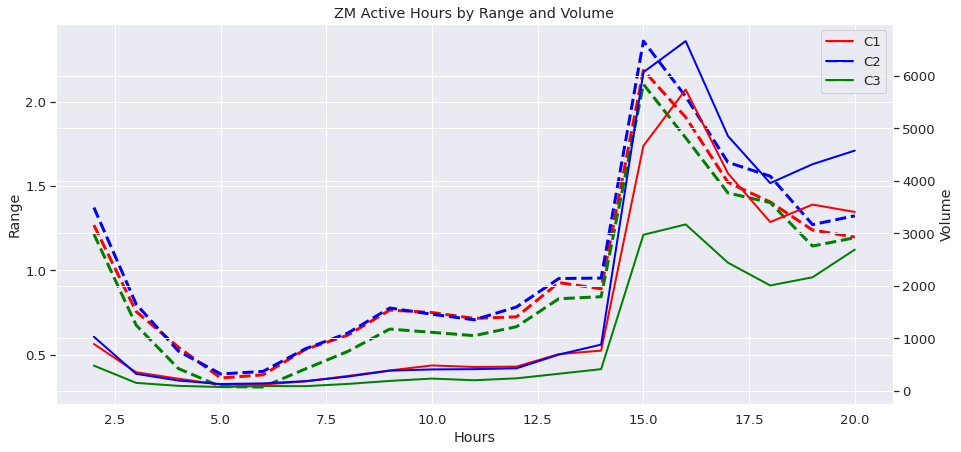

In [ ]:
zr_1 = zm_60.c1.High - zm_60.c1.Low
zr_2 = zm_60.c2.High - zm_60.c2.Low
zr_3 = zm_60.c3.High - zm_60.c3.Low

zv_1 = zm_60.c1.Volume
zv_2 = zm_60.c2.Volume
zv_3 = zm_60.c3.Volume

fig, ax = plt.subplots(1, figsize=(15,7))
ax1=ax.twinx()

ax.plot((zr_1.groupby(zr_1.index.hour).mean()), '--', color='red', linewidth=3, label='C1')
ax.plot((zr_2.groupby(zr_2.index.hour).mean()), '--', color='blue', linewidth=3, label='C2')
ax.plot((zr_3.groupby(zr_3.index.hour).mean()), '--', color='green', linewidth=3, label='C3')

ax1.plot((zv_1.groupby(zv_1.index.hour).mean()), color='red', linewidth=2, label='C1')
ax1.plot((zv_2.groupby(zv_2.index.hour).mean()), color='blue', linewidth=2, label='C2')
ax1.plot((zv_3.groupby(zv_3.index.hour).mean()), color='green', linewidth=2, label='C3')

ax1.legend()
ax.legend()

ax.set_ylabel('Range')

ax1.set_ylabel('Volume')

ax.set_xlabel('Hours')
ax.set_title('ZM Active Hours by Range and Volume')
# ax.set_xticklabels(range(1,20,2))
plt.show()

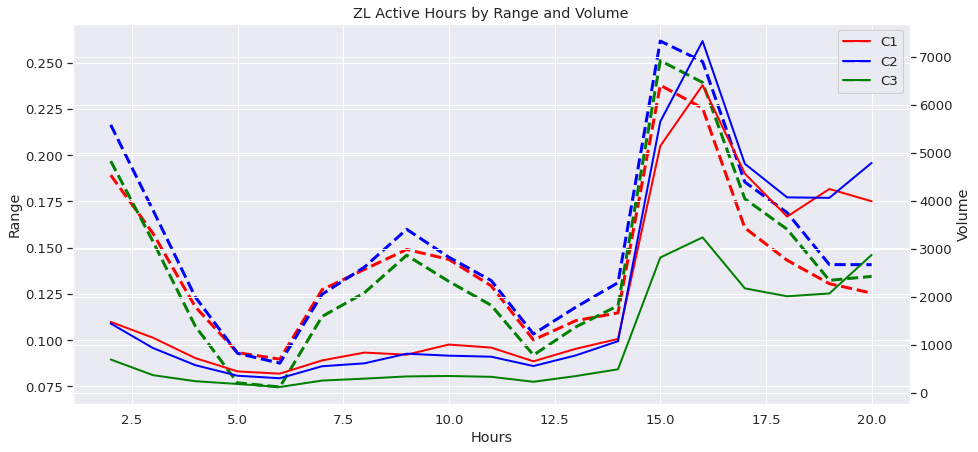

In [ ]:
zr_1 = zl_60.c1.High - zl_60.c1.Low
zr_2 = zl_60.c2.High - zl_60.c2.Low
zr_3 = zl_60.c3.High - zl_60.c3.Low

zv_1 = zl_60.c1.Volume
zv_2 = zl_60.c2.Volume
zv_3 = zl_60.c3.Volume

fig, ax = plt.subplots(1, figsize=(15,7))
ax1=ax.twinx()

ax.plot((zr_1.groupby(zr_1.index.hour).mean()), '--', color='red', linewidth=3, label='C1')
ax.plot((zr_2.groupby(zr_2.index.hour).mean()), '--', color='blue', linewidth=3, label='C2')
ax.plot((zr_3.groupby(zr_3.index.hour).mean()), '--', color='green', linewidth=3, label='C3')

ax1.plot((zv_1.groupby(zv_1.index.hour).mean()), color='red', linewidth=2, label='C1')
ax1.plot((zv_2.groupby(zv_2.index.hour).mean()), color='blue', linewidth=2, label='C2')
ax1.plot((zv_3.groupby(zv_3.index.hour).mean()), color='green', linewidth=2, label='C3')

ax1.legend()
ax.legend()

ax.set_ylabel('Range')

ax1.set_ylabel('Volume')

ax.set_xlabel('Hours')
ax.set_title('ZL Active Hours by Range and Volume')
# ax.set_xticklabels(range(1,20,2))
plt.show()

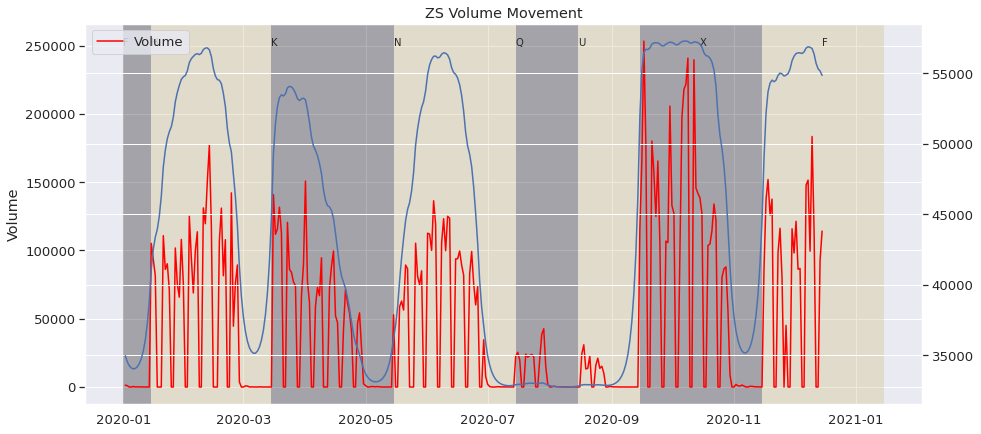

In [ ]:
zs_vol = zs_60.c1.Volume
zs_vol = zs_vol.resample('d').sum().replace(to_replace=np.nan, value=0)


model = sm.tsa.MarkovRegression(zs_vol, k_regimes=2)
fitted_model = model.fit()

fig, ax = plt.subplots(1, figsize=(15,7))
ax1=ax.twinx()
ax.plot(zs_vol.index, zs_vol, color='red', label = 'Volume')
ax1.plot(fitted_model.predict(start=0))
loc = 250000
ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'X')
ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')
ax.legend(loc='upper left')
ax.set_ylabel('Volume')
ax.set_title('ZS Volume Movement')
plt.show()

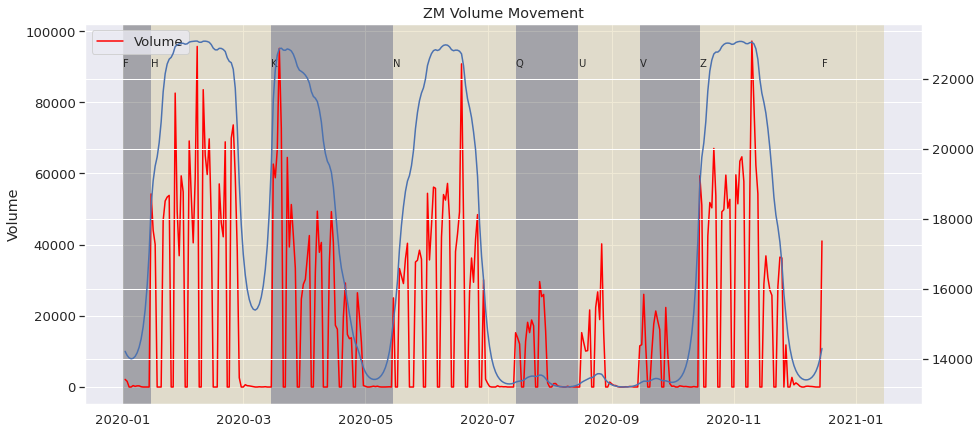

In [ ]:
zm_vol = zm_60.c1.Volume
zm_vol = zm_vol.resample('d').sum().replace(to_replace=np.nan, value=0)


model = sm.tsa.MarkovRegression(zm_vol, k_regimes=2)
fitted_model = model.fit()

fig, ax = plt.subplots(1, figsize=(15,7))
ax1=ax.twinx()
ax.plot(zm_vol.index, zm_vol, color='red', label = 'Volume')
ax1.plot(fitted_model.predict(start=0))
loc = 90000
ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-10-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-10-2020", '%d-%m-%Y'), datetime.strptime("15-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-12-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'V')
ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'Z')
ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')
ax.legend(loc='upper left')
ax.set_ylabel('Volume')
ax.set_title('ZM Volume Movement')
plt.show()

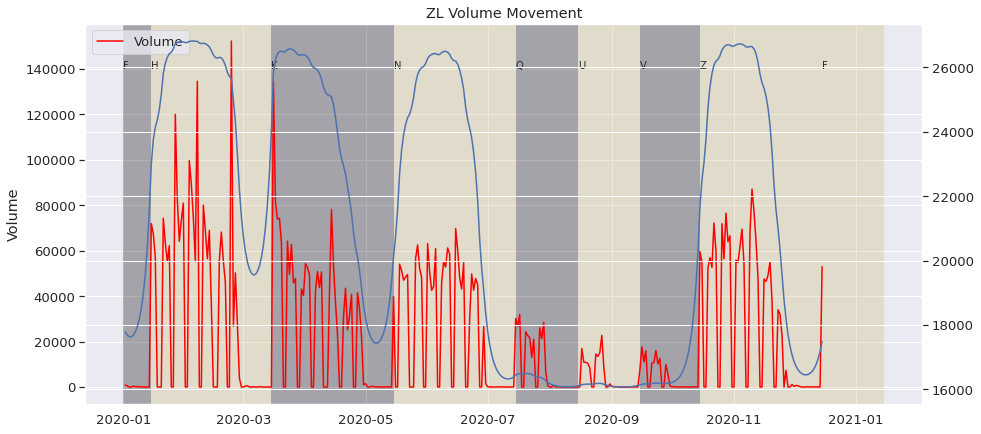

In [ ]:
zl_vol = zl_60.c1.Volume
zl_vol = zl_vol.resample('d').sum().replace(to_replace=np.nan, value=0)


model = sm.tsa.MarkovRegression(zl_vol, k_regimes=2)
fitted_model = model.fit()

fig, ax = plt.subplots(1, figsize=(15,7))
ax1=ax.twinx()
ax.plot(zl_vol.index, zl_vol, color='red', label = 'Volume')
ax1.plot(fitted_model.predict(start=0))
loc = 140000
ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-10-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-10-2020", '%d-%m-%Y'), datetime.strptime("15-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-12-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'V')
ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'Z')
ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')
ax.legend(loc='upper left')
ax.set_ylabel('Volume')
ax.set_title('ZL Volume Movement')
plt.show()

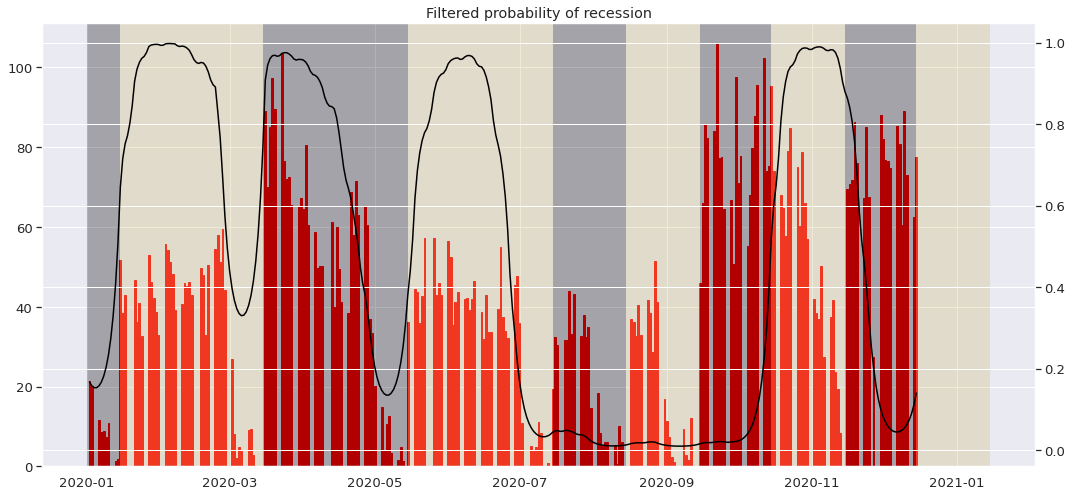

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,7))
ax1 = ax.twinx()
ax1.plot(fitted_model.smoothed_marginal_probabilities[1], color='black')
# ax.plot(zs_vol.index,fitted_model.predict(start=92, end=100))
ax.bar(zs_range.index, zs_range, color='red', edgecolor='red')
ax.set(title='Filtered probability of recession')
ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-10-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-10-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("15-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black', alpha=0.3)
ax.axvspan(datetime.strptime("15-12-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)

fig.tight_layout()

Crush margin

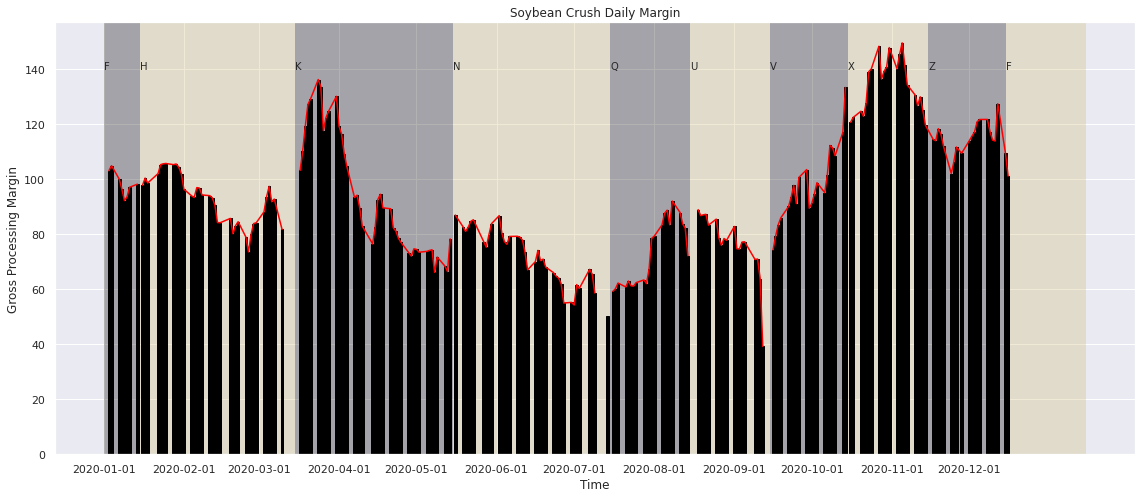

In [ ]:
loc = 140
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])
gpm = (2.2*zm_1D.c1.Last)+(11*zl_1D.c1.Last)-(zs_1D.c1.Last)
# ax1 = ax.twinx()
# ax2 = ax.twinx()
# ax3= ax.twinx()

ax.plot(gpm.index,gpm, color='red')
# ax1.plot(zm_1D.c1.Last.index,zm_1D.c1.Last*2.2, color='cyan')
# ax1.plot(zl_1D.c1.Last.index,zl_1D.c1.Last*11, color='lime')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-10-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-10-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("15-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black', alpha=0.3)
ax.axvspan(datetime.strptime("15-12-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.set_xticks(["01-01-2020", "02-01-2020","03-01-2020","04-01-2020","05-01-2020","06-01-2020","07-01-2020","08-01-2020","09-01-2020","10-01-2020","11-01-2020","12-01-2020"])

ax.bar(gpm.index,gpm, color='black', width=1, edgecolor='black')

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'V')
ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'X')
ax.text(datetime.strptime("15-11-2020", '%d-%m-%Y'),loc,'Z')
ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')

# ax.legend(['GPM'],loc='upper left')
# ax3.legend(['ZS'],loc='upper left')
# ax1.legend(['ZM'],loc='upper center')
# ax2.legend(['ZL'],loc='upper right')
ax.set_title('Soybean Crush Daily Margin')
ax.set_xlabel('Time')
ax.set_ylabel('Gross Processing Margin')
plt.show()

### **Other**

Daily Ranges

Text(0.5, 1.0, 'ZS Volume Spikes')

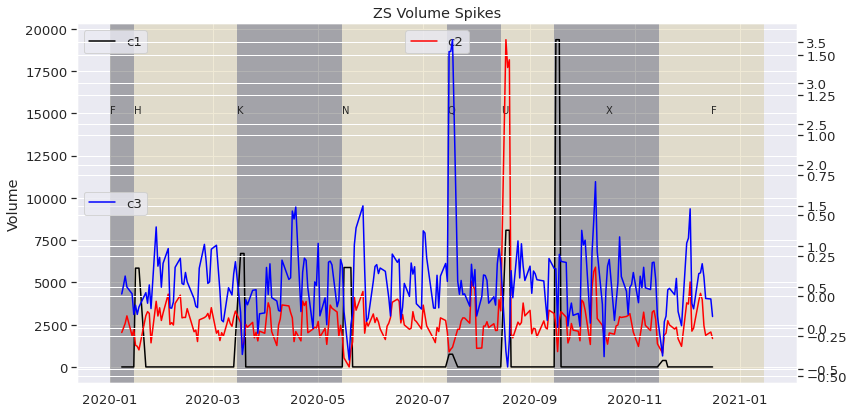

In [ ]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_axes([0,0,1,1])
# ax.plot(zs_1D.c1.Volume)
ax1=ax.twinx()
ax2=ax.twinx()
loc=15000
ax.plot(zs_1D.c1.Volume.pct_change().dropna().rolling(3).mean(), color='black', label='c1')
ax1.plot(zs_1D.c2.Volume.pct_change().dropna().rolling(3).mean(), color='red', label='c2')
ax2.plot(zs_1D.c3.Volume.pct_change().dropna().rolling(3).mean(), color='blue', label='c3')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'X')
ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')
ax.legend(loc='upper left')
ax1.legend(loc='upper center')
ax2.legend(loc='center left')
ax.set_ylabel('Volume')
ax.set_title('ZS Volume Spikes')

### **PATTERNS**

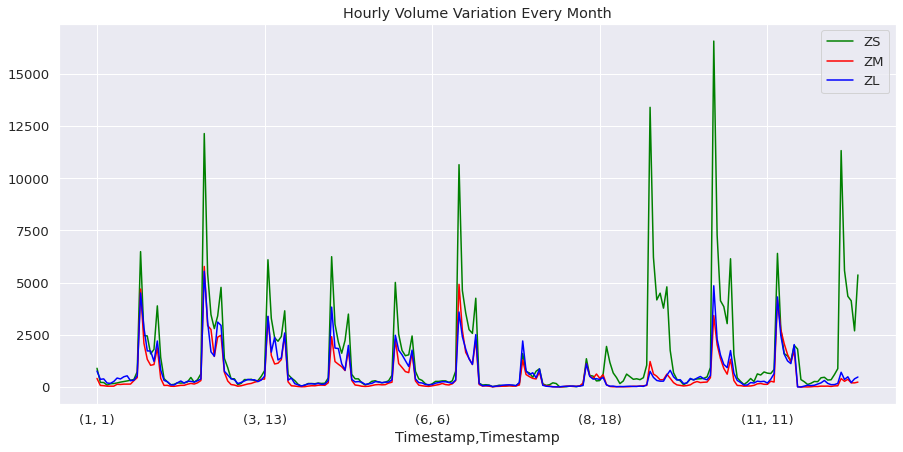

In [ ]:
zs_vol = zs_15.c1.Volume
zm_vol = zm_15.c1.Volume
zl_vol = zl_15.c1.Volume
# Grouping by month and then by hour
# thus format is (Jan,2pm)(Jan,3pm)...(jan,3am) and so on for every month
fig, ax = plt.subplots(1, figsize=(15,7))

zs_vol.groupby([(zs_vol.index.month),(zs_vol.index.hour)]).mean().plot(color='green', label='ZS')
zm_vol.groupby([(zm_vol.index.month),(zm_vol.index.hour)]).mean().plot(color='red', label='ZM')
zl_vol.groupby([(zl_vol.index.month),(zl_vol.index.hour)]).mean().plot(color='blue', label='ZL')

ax.legend()
ax.set_title('Hourly Volume Variation Every Month')
plt.show()

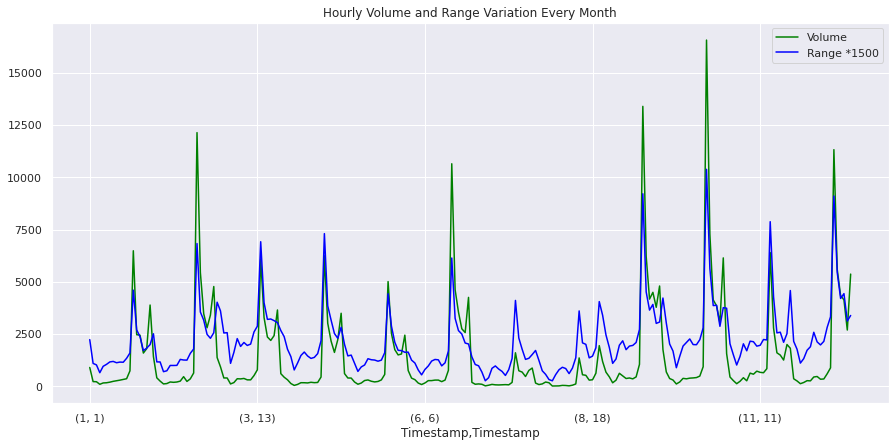

In [ ]:
zs_r = zs_15.c1.High - zs_15.c1.Low
zs_vol = zs_15.c1.Volume

fig, ax = plt.subplots(1, figsize=(15,7))

zs_vol.groupby([(zs_vol.index.month),(zs_vol.index.hour)]).mean().plot(color='green', label='Volume')
(zs_r.groupby([(zs_r.index.month),(zs_r.index.hour)]).mean()*1500).plot(color='blue', label='Range *1500')

ax.legend()
ax.set_title('Hourly Volume and Range Variation Every Month')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=orde

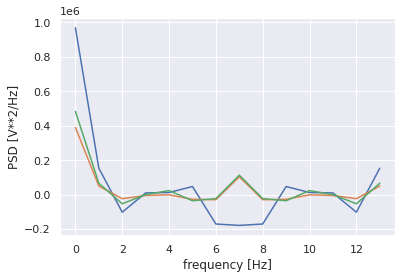

In [ ]:
import scipy

zs_vol = zs_1D.c1.Volume
zm_vol = zm_1D.c1.Volume
zl_vol = zl_1D.c1.Volume


s = zs_vol.groupby([(zs_vol.index.month),(zs_vol.index.hour)]).mean().values
sm = zm_vol.groupby([(zm_vol.index.month),(zm_vol.index.hour)]).mean().values
bo = zl_vol.groupby([(zl_vol.index.month),(zl_vol.index.hour)]).mean().values

fs = scipy.fft(s)
fsm = scipy.fft(sm)
fbo = scipy.fft(bo)
plt.plot(fs)
plt.plot(fsm)
plt.plot(fbo)

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
!pip3 install investpy

In [ ]:
investpy.bonds.get_bonds(country='united states')

country      name              full_name
0  united states  U.S. 30Y  United States 30-Year
1  united states  U.S. 10Y  United States 10-Year
2  united states   U.S. 7Y   United States 7-Year
3  united states   U.S. 5Y   United States 5-Year
4  united states   U.S. 3Y   United States 3-Year
5  united states   U.S. 3M  United States 3-Month
6  united states   U.S. 1Y   United States 1-Year
7  united states   U.S. 6M  United States 6-Month
8  united states   U.S. 1M  United States 1-Month
9  united states   U.S. 2Y   United States 2-Year

In [ ]:
import investpy

rfi = investpy.get_bond_historical_data(bond='U.S. 10Y', from_date='01/01/2020', to_date='31/12/2020')
spot = pd.read_csv('cash_price_mgex_nsi.csv')
spot.index=pd.to_datetime(spot.Date)

In [ ]:
spot[50:100]

Date   Cents Elevators
Date                                    
2020-03-16  03/16/2020  772.88     2,821
2020-03-17  03/17/2020  775.82     2,825
2020-03-18  03/18/2020  776.98     2,863
2020-03-19  03/19/2020  795.30     2,855
2020-03-20  03/20/2020  814.91     2,847
2020-03-23  03/23/2020  836.85     2,879
2020-03-24  03/24/2020  839.96     2,886
2020-03-25  03/25/2020  835.26     2,879
2020-03-26  03/26/2020  834.07     2,861
2020-03-27  03/27/2020  835.46     2,869
2020-03-30  03/30/2020  836.51     2,904
2020-03-31  03/31/2020  840.40     2,789
2020-04-01  04-01-2020  817.04     2,749
2020-04-02  04-02-2020  813.02     2,854
2020-04-03  04-03-2020  808.96     2,881
2020-04-06  04-06-2020  810.23     2,889
2020-04-07  04-07-2020  809.42     2,889
2020-04-08  04-08-2020  809.09     2,886
2020-04-09  04-09-2020  818.01     2,900
2020-04-13  04/13/2020  809.19     2,885
2020-04-14  04/14/2020  801.82     2,873
2020-04-15  04/15/2020  797.55     2,899
2020-04-16  04/16/2020  791.25     2,873
2020-04-17  04/17/2020  787.71     2,908
2020-04-20  04/20/2020  781.67     2,903
2020-04-21  04/21/2020  785.54     2,876
2020-04-22  04/22/2020  790.15     2,905
2020-04-23  04/23/2020  795.27     2,896
2020-04-24  04/24/2020  788.19     2,865
2020-04-27  04/27/2020  785.70     2,880
2020-04-28  04/28/2020  783.24     2,878
2020-04-29  04/29/2020  788.53     2,874
2020-04-30  04/30/2020  807.63     2,771
2020-05-01  05-01-2020  802.74     2,739
2020-05-04  05-04-2020  789.61     2,833
2020-05-05  05-05-2020  793.26     2,843
2020-05-06  05-06-2020  786.53     2,845
2020-05-07  05-07-2020  798.70     2,848
2020-05-08  05-08-2020  804.87     2,856
2020-05-11  05-11-2020  810.14     2,861
2020-05-12  05-12-2020  807.36     2,865
2020-05-13  05/13/2020  794.70     2,854
2020-05-14  05/14/2020  792.03     2,830
2020-05-15  05/15/2020  793.25     2,811
2020-05-18  05/18/2020  799.80     2,798
2020-05-19  05/19/2020  797.21     2,808
2020-05-20  05/20/2020  800.54     2,794
2020-05-21  05/21/2020  789.73     2,819
2020-05-22  05/22/2020  787.46     2,804
2020-05-26  05/26/2020  801.48     2,818

In [ ]:
zs_1D.c1.Last.groupby([zs_1D.c1.Last.index.date]).sum()

2020-01-03     943.25
2020-01-04     930.00
2020-01-07     932.50
2020-01-08     934.25
2020-01-09     938.25
               ...   
2020-12-10    1159.00
2020-12-11    1154.25
2020-12-12    1161.50
2020-12-15    1169.75
2020-12-16    1185.75
Name: Last, Length: 240, dtype: float64

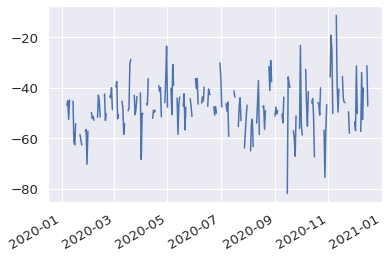

In [ ]:
(spot.Cents-zs_1D.c1.Last.groupby([zs_1D.c1.Last.index.date]).sum()).plot()
# zs_1D.c1.Last.plot()

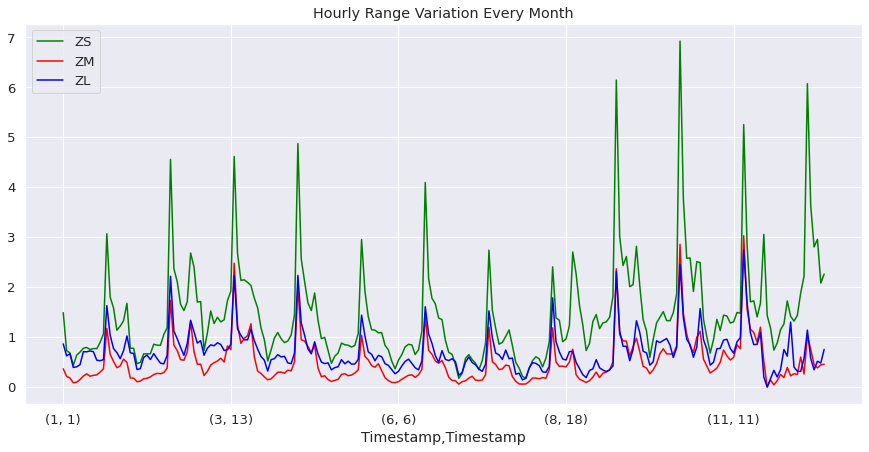

In [ ]:
zs_r = zs_15.c1.High - zs_15.c1.Low
zm_r = zm_15.c1.High - zm_15.c1.Low
zl_r = zl_15.c1.High - zl_15.c1.Low

fig, ax = plt.subplots(1, figsize=(15,7))

zs_r.groupby([(zs_r.index.month),(zs_r.index.hour)]).mean().plot(color='green', label='ZS')
zm_r.groupby([(zm_r.index.month),(zm_r.index.hour)]).mean().plot(color='red', label='ZM')
(zl_r.groupby([(zl_r.index.month),(zl_r.index.hour)]).mean()*10).plot(color='blue', label='ZL')

# ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("31-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
# ax.axvspan(datetime.strptime("01-02-2020", '%d-%m-%Y'), datetime.strptime("29-02-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
# ax.axvspan(datetime.strptime("01-03-2020", '%d-%m-%Y'), datetime.strptime("31-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
# ax.axvspan(datetime.strptime("01-04-2020", '%d-%m-%Y'), datetime.strptime("30-04-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
# ax.axvspan(datetime.strptime("01-05-2020", '%d-%m-%Y'), datetime.strptime("31-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
# ax.axvspan(datetime.strptime("01-06-2020", '%d-%m-%Y'), datetime.strptime("30-06-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
# ax.axvspan(datetime.strptime("01-07-2020", '%d-%m-%Y'), datetime.strptime("31-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
# ax.axvspan(datetime.strptime("01-08-2020", '%d-%m-%Y'), datetime.strptime("31-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
# ax.axvspan(datetime.strptime("01-09-2020", '%d-%m-%Y'), datetime.strptime("30-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black', alpha=0.3)
# ax.axvspan(datetime.strptime("01-10-2020", '%d-%m-%Y'), datetime.strptime("31-10-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
# ax.axvspan(datetime.strptime("01-11-2020", '%d-%m-%Y'), datetime.strptime("30-11-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='black', alpha=0.3)
# ax.axvspan(datetime.strptime("01-12-2020", '%d-%m-%Y'), datetime.strptime("31-12-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)

ax.legend()
ax.set_title('Hourly Range Variation Every Month')
plt.show()

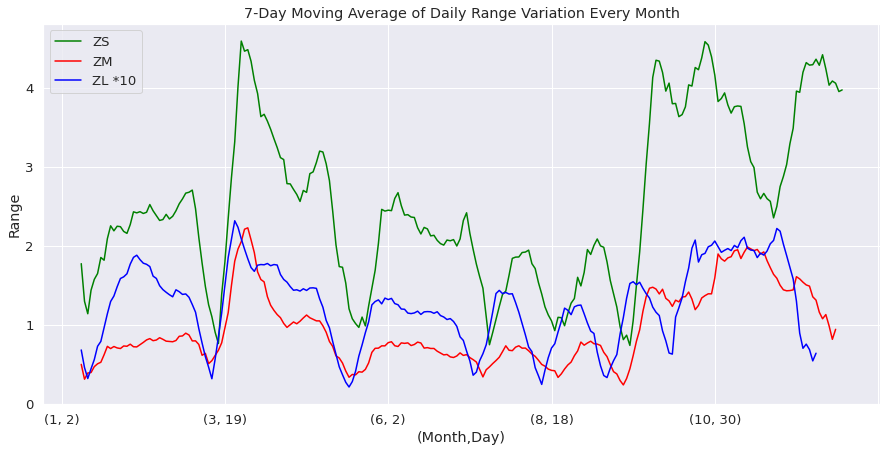

In [ ]:
zs_r = zs_60.c1.High - zs_60.c1.Low
zm_r = zm_60.c1.High - zm_60.c1.Low
zl_r = zl_60.c1.High - zl_60.c1.Low

fig, ax = plt.subplots(1, figsize=(15,7))

(zs_r.groupby([(zs_r.index.month),(zs_r.index.day)]).mean().rolling(7).mean()).plot(color='green', label='ZS')
(zm_r.groupby([(zm_r.index.month),(zm_r.index.day)]).mean().rolling(7).mean()).plot(color='red', label='ZM')
((zl_r.groupby([(zl_r.index.month),(zl_r.index.day)]).mean()*10).rolling(7).mean()).plot(color='blue', label='ZL *10')


ax.legend()
ax.set_ylabel('Range')
ax.set_xlabel('(Month,Day)')
ax.set_title('7-Day Moving Average of Daily Range Variation Every Month')
plt.show()

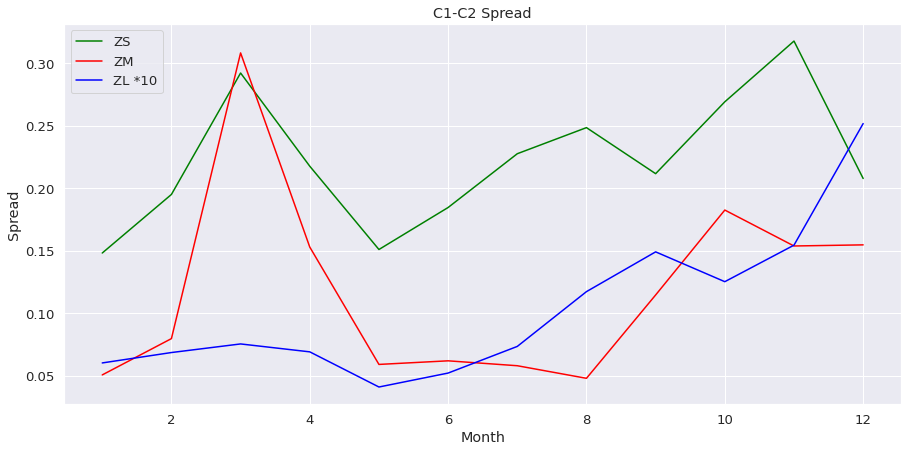

In [ ]:
zs_r = zs_15.c1_c2_spread.High - zs_15.c1_c2_spread.Low
zm_r = zm_15.c1_c2_spread.High - zm_15.c1_c2_spread.Low
zl_r = zl_15.c1_c2_spread.High - zl_15.c1_c2_spread.Low

fig, ax = plt.subplots(1, figsize=(15,7))

zs_r.groupby(zs_r.index.month).mean().plot(color='green', label='ZS')
zm_r.groupby(zm_r.index.month).mean().plot(color='red', label='ZM')
(zl_r.groupby(zl_r.index.month).mean()*10).plot(color='blue', label='ZL *10')

ax.legend()
ax.set_ylabel('Spread')
ax.set_xlabel('Month')
ax.set_title('C1-C2 Spread Variation Per Month')
plt.show()

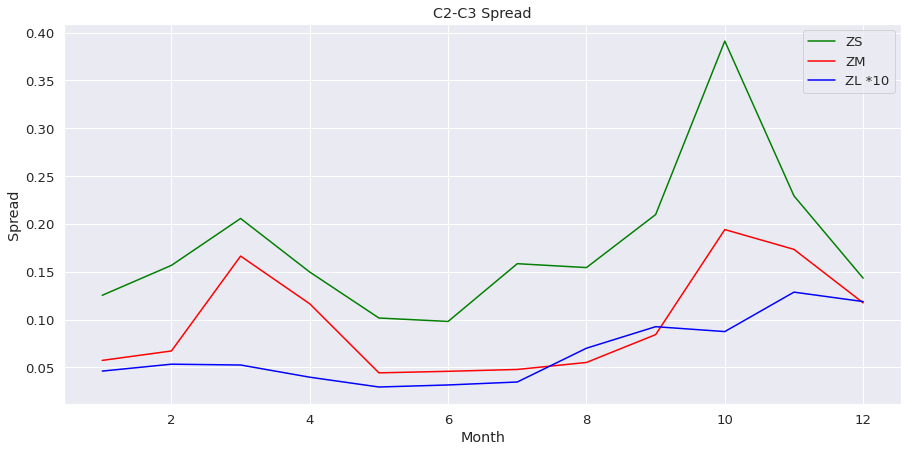

In [ ]:
zs_r = zs_15.c2_c3_spread.High - zs_15.c2_c3_spread.Low
zm_r = zm_15.c2_c3_spread.High - zm_15.c2_c3_spread.Low
zl_r = zl_15.c2_c3_spread.High - zl_15.c2_c3_spread.Low

fig, ax = plt.subplots(1, figsize=(15,7))

zs_r.groupby(zs_r.index.month).mean().plot(color='green', label='ZS')
zm_r.groupby(zm_r.index.month).mean().plot(color='red', label='ZM')
(zl_r.groupby(zl_r.index.month).mean()*10).plot(color='blue', label='ZL *10')

ax.legend()
ax.set_ylabel('Spread')
ax.set_xlabel('Month')
ax.set_title('C2-C3 Spread')
plt.show()

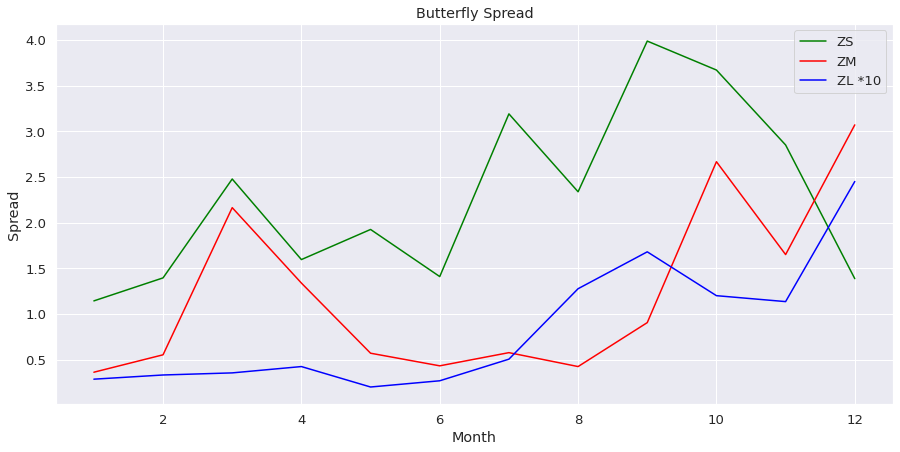

In [ ]:
s_fly.index = pd.to_datetime(s_fly.index)
m_fly.index = pd.to_datetime(m_fly.index)
l_fly.index = pd.to_datetime(l_fly.index)

fig, ax = plt.subplots(1, figsize=(15,7))

s_fly.groupby(s_fly.index.month).mean().plot(color='green', label='ZS')
m_fly.groupby(m_fly.index.month).mean().plot(color='red', label='ZM')
(l_fly.groupby(l_fly.index.month).mean()*10).plot(color='blue', label='ZL *10')

ax.legend()
ax.set_ylabel('Spread')
ax.set_xlabel('Month')
ax.set_title('Butterfly Spread')
plt.show()

### **Daily Range**

ZS Outrights

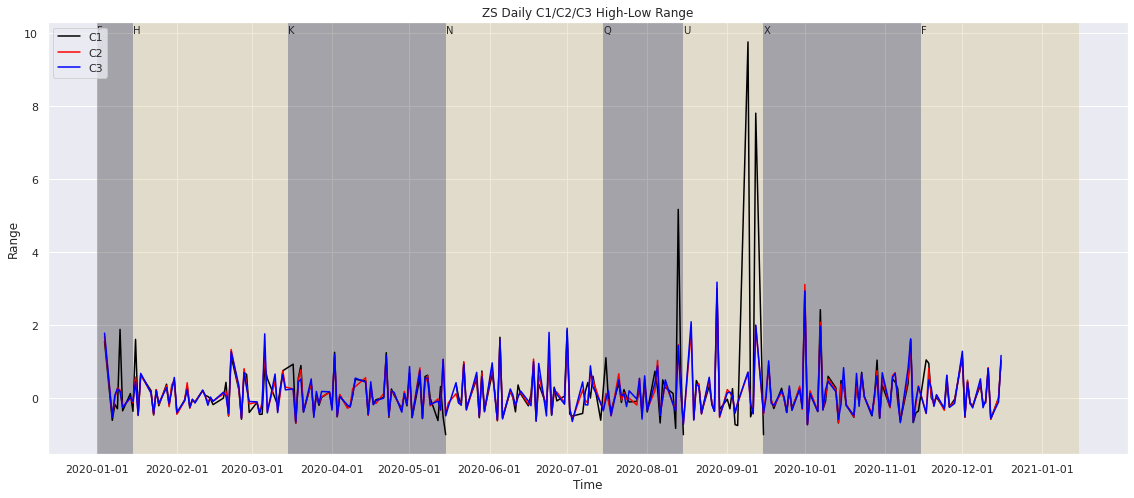

In [ ]:
loc = 10
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])
ax.plot(zs_1D.c1.index,(zs_1D.c1.High - zs_1D.c1.Low).pct_change(), color='black')
ax.plot(zs_1D.c2.index,(zs_1D.c2.High - zs_1D.c2.Low).pct_change(), color='red')
ax.plot(zs_1D.c3.index,(zs_1D.c3.High - zs_1D.c3.Low).pct_change(), color='blue')
# ax1.plot(zs_1D.c1_c2_spread.index,(zs_1D.c1_c2_spread.High - zs_1D.c1_c2_spread.Low), color='green')
# ax1.plot(zs_1D.c2_c3_spread.index,(zs_1D.c2_c3_spread.High - zs_1D.c2_c3_spread.Low), color='purple')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3) # ZS
ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y',alpha=0.3) # ZS
# ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-10-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
# ax.axvspan(datetime.strptime("15-10-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
# ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("15-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black', alpha=0.3)
# ax.axvspan(datetime.strptime("15-12-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.set_xticks(["01-01-2020", "02-01-2020","03-01-2020","04-01-2020","05-01-2020","06-01-2020","07-01-2020","08-01-2020","09-01-2020","10-01-2020","11-01-2020","12-01-2020","01-01-2021"])

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
# ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'V')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'X')#ZS
# ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'X')
ax.text(datetime.strptime("15-11-2020", '%d-%m-%Y'),loc,'F')#ZS
# ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')

ax.legend(['C1','C2','C3'],loc='upper left')
ax.set_title('ZS Daily C1/C2/C3 High-Low Range')
ax.set_xlabel('Time')
ax.set_ylabel('Range')
plt.show()

In [ ]:
(zs_1D.c1.High-zs_1D.c1.Low).pct_change().dropna().describe()

count    239.000000
mean            inf
std             NaN
min       -1.000000
25%       -0.308485
50%        0.025641
75%        0.430502
max             inf
dtype: float64

In [ ]:
(zs_1D.c2.High-zs_1D.c2.Low).pct_change().describe()

count    241.000000
mean       0.135837
std        0.597812
min       -0.729730
25%       -0.277778
50%        0.000000
75%        0.410959
max        3.111111
dtype: float64

In [ ]:
(zs_1D.c3.High-zs_1D.c3.Low).pct_change().describe()

count    241.000000
mean       0.145802
std        0.625097
min       -0.727811
25%       -0.266667
50%        0.030303
75%        0.444444
max        3.173913
dtype: float64

ZS spreads

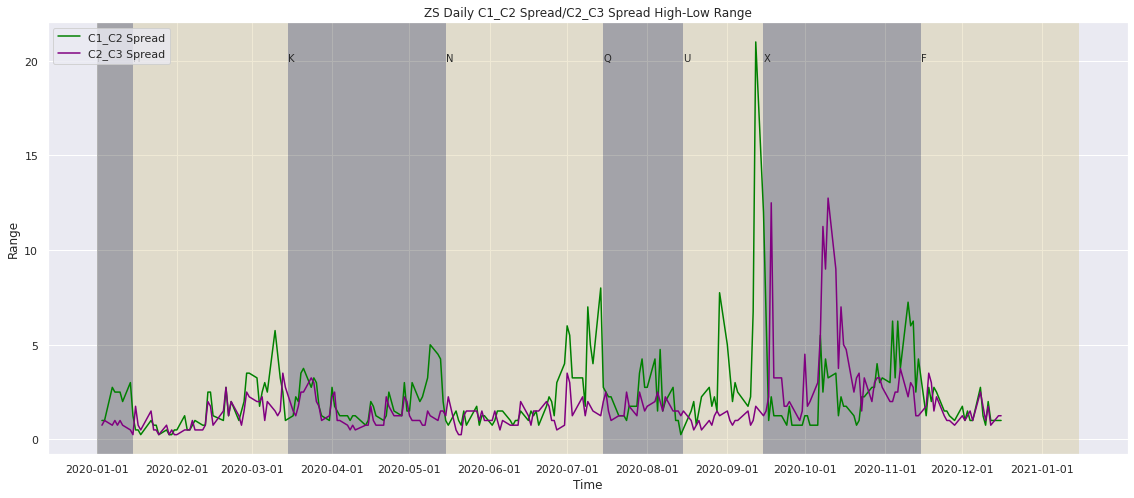

In [ ]:
loc = 20
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])
ax.plot(zs_1D.c1_c2_spread.index,(zs_1D.c1_c2_spread.High - zs_1D.c1_c2_spread.Low), color='green')
ax.plot(zs_1D.c2_c3_spread.index,(zs_1D.c2_c3_spread.High - zs_1D.c2_c3_spread.Low), color='purple')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3) # ZS
ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y',alpha=0.3) # ZS
# ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-10-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
# ax.axvspan(datetime.strptime("15-10-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
# ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("15-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black', alpha=0.3)
# ax.axvspan(datetime.strptime("15-12-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.set_xticks(["01-01-2020", "02-01-2020","03-01-2020","04-01-2020","05-01-2020","06-01-2020","07-01-2020","08-01-2020","09-01-2020","10-01-2020","11-01-2020","12-01-2020","01-01-2021"])

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
# ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'V')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'X')#ZS
# ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'X')
ax.text(datetime.strptime("15-11-2020", '%d-%m-%Y'),loc,'F')#ZS
# ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')

ax.legend(['C1_C2 Spread','C2_C3 Spread'],loc='upper left')
ax.set_title('ZS Daily C1_C2 Spread/C2_C3 Spread High-Low Range')
ax.set_xlabel('Time')
ax.set_ylabel('Range')
plt.show()

In [ ]:
(zs_1D.c1_c2_spread.High-zs_1D.c1_c2_spread.Low).pct_change().describe()

count    238.000000
mean       0.204309
std        0.879763
min       -0.916667
25%       -0.296429
50%        0.000000
75%        0.488636
max        6.333333
dtype: float64

In [ ]:
(zs_1D.c2_c3_spread.High-zs_1D.c2_c3_spread.Low).pct_change().describe()

count    241.000000
mean       0.168406
std        0.797517
min       -0.777778
25%       -0.285714
50%        0.000000
75%        0.428571
max        6.000000
dtype: float64

ZM Outrights

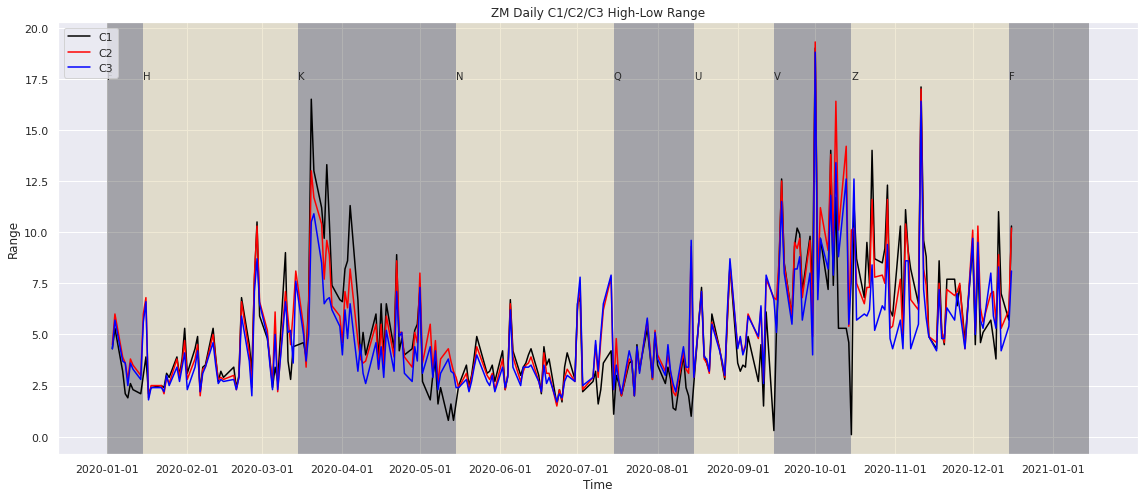

In [ ]:
loc = 17.5
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])
ax.plot(zm_1D.c1.index,(zm_1D.c1.High - zm_1D.c1.Low), color='black')
ax.plot(zm_1D.c2.index,(zm_1D.c2.High - zm_1D.c2.Low), color='red')
ax.plot(zm_1D.c3.index,(zm_1D.c3.High - zm_1D.c3.Low), color='blue')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
# ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3) # ZS
# ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y',alpha=0.3) # ZS
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-10-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-10-2020", '%d-%m-%Y'), datetime.strptime("15-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-12-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='black', alpha=0.3)
ax.set_xticks(["01-01-2020", "02-01-2020","03-01-2020","04-01-2020","05-01-2020","06-01-2020","07-01-2020","08-01-2020","09-01-2020","10-01-2020","11-01-2020","12-01-2020","01-01-2021"])

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'V')
# ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'X')#ZS
ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'Z')
# ax.text(datetime.strptime("15-11-2020", '%d-%m-%Y'),loc,'F')#ZS
ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')

ax.legend(['C1','C2','C3'],loc='upper left')
ax.set_title('ZM Daily C1/C2/C3 High-Low Range')
ax.set_xlabel('Time')
ax.set_ylabel('Range')
plt.show()

In [ ]:
(zm_1D.c1.High-zm_1D.c1.Low).pct_change().describe()

count    237.000000
mean       0.683907
std        7.436984
min       -0.978261
25%       -0.294118
50%       -0.029412
75%        0.394737
max      113.000000
dtype: float64

In [ ]:
(zm_1D.c2.High-zm_1D.c2.Low).pct_change().describe()

count    241.000000
mean       0.121570
std        0.567587
min       -0.720588
25%       -0.258065
50%       -0.050633
75%        0.380952
max        2.938776
dtype: float64

In [ ]:
(zm_1D.c3.High-zm_1D.c3.Low).describe()

count    242.000000
mean       4.959091
std        2.571892
min        1.700000
25%        3.100000
50%        4.300000
75%        6.200000
max       18.800000
dtype: float64

ZM Spreads

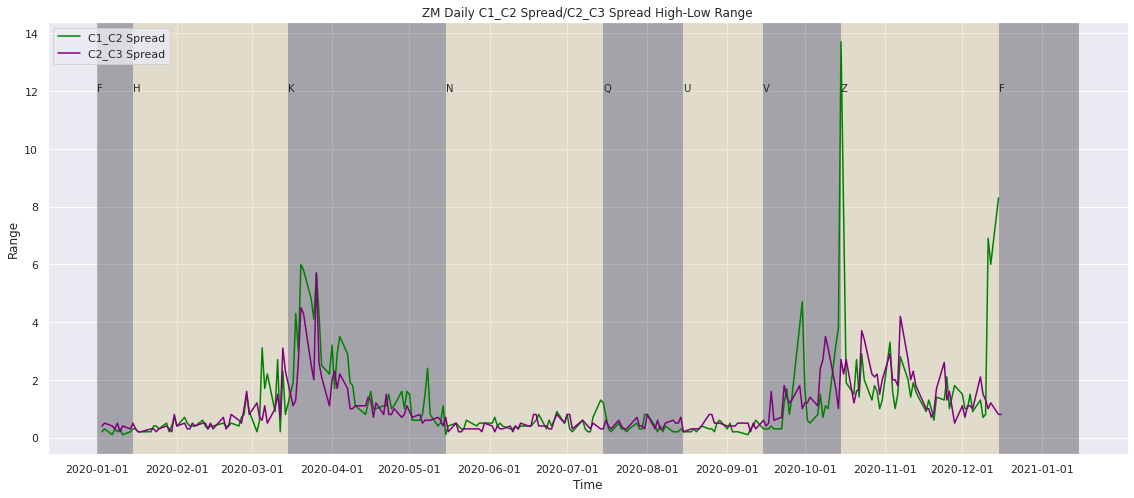

In [ ]:
loc = 12
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])
ax.plot(zm_1D.c1_c2_spread.index,(zm_1D.c1_c2_spread.High - zm_1D.c1_c2_spread.Low), color='green')
ax.plot(zm_1D.c2_c3_spread.index,(zm_1D.c2_c3_spread.High - zm_1D.c2_c3_spread.Low), color='purple')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
# ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3) # ZS
# ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y',alpha=0.3) # ZS
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-10-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-10-2020", '%d-%m-%Y'), datetime.strptime("15-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-12-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='black', alpha=0.3)
ax.set_xticks(["01-01-2020", "02-01-2020","03-01-2020","04-01-2020","05-01-2020","06-01-2020","07-01-2020","08-01-2020","09-01-2020","10-01-2020","11-01-2020","12-01-2020","01-01-2021"])

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'V')
# ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'X')#ZS
ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'Z')
# ax.text(datetime.strptime("15-11-2020", '%d-%m-%Y'),loc,'F')#ZS
ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')

ax.legend(['C1_C2 Spread','C2_C3 Spread'],loc='upper left')
ax.set_title('ZM Daily C1_C2 Spread/C2_C3 Spread High-Low Range')
ax.set_xlabel('Time')
ax.set_ylabel('Range')
plt.show()

In [ ]:
(zm_1D.c1_c2_spread.High-zm_1D.c1_c2_spread.Low).describe()

count    238.000000
mean       1.168487
std        1.512471
min        0.100000
25%        0.300000
50%        0.600000
75%        1.475000
max       13.700000
dtype: float64

In [ ]:
(zm_1D.c2_c3_spread.High-zm_1D.c2_c3_spread.Low).describe()

count    242.000000
mean       0.988843
std        0.882941
min        0.200000
25%        0.400000
50%        0.700000
75%        1.275000
max        5.700000
dtype: float64

ZL Outrights

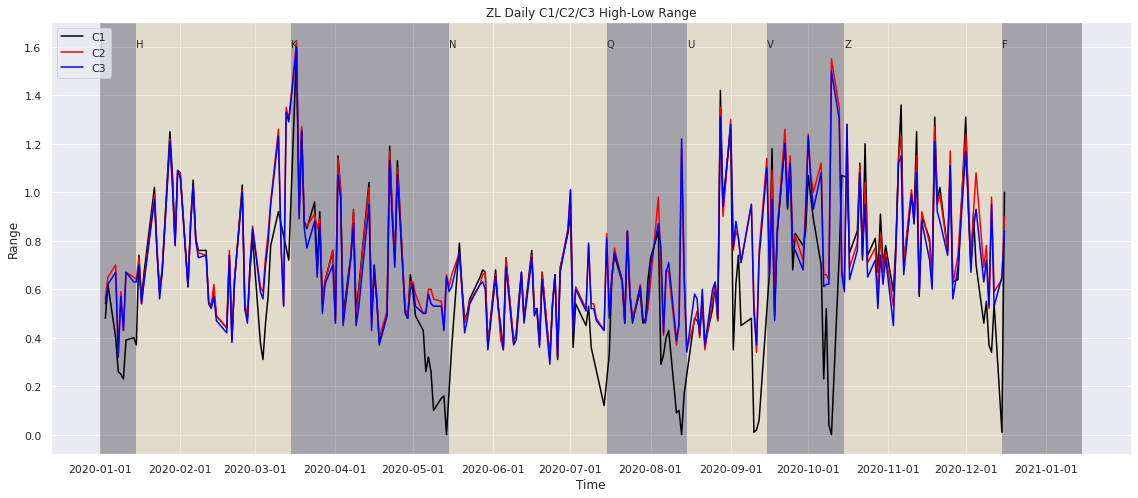

In [ ]:
loc = 1.6
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])
ax.plot(zl_1D.c1.index,(zl_1D.c1.High - zl_1D.c1.Low), color='black')
ax.plot(zl_1D.c2.index,(zl_1D.c2.High - zl_1D.c2.Low), color='red')
ax.plot(zl_1D.c3.index,(zl_1D.c3.High - zl_1D.c3.Low), color='blue')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
# ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3) # ZS
# ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y',alpha=0.3) # ZS
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-10-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-10-2020", '%d-%m-%Y'), datetime.strptime("15-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-12-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='black', alpha=0.3)
ax.set_xticks(["01-01-2020", "02-01-2020","03-01-2020","04-01-2020","05-01-2020","06-01-2020","07-01-2020","08-01-2020","09-01-2020","10-01-2020","11-01-2020","12-01-2020","01-01-2021"])

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'V')
# ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'X')#ZS
ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'Z')
# ax.text(datetime.strptime("15-11-2020", '%d-%m-%Y'),loc,'F')#ZS
ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')

ax.legend(['C1','C2','C3'],loc='upper left')
ax.set_title('ZL Daily C1/C2/C3 High-Low Range')
ax.set_xlabel('Time')
ax.set_ylabel('Range')
plt.show()

In [ ]:
(zl_1D.c1.High-zl_1D.c1.Low).describe()

count    232.000000
mean       0.648190
std        0.300423
min        0.000000
25%        0.460000
50%        0.630000
75%        0.830000
max        1.590000
dtype: float64

In [ ]:
(zl_1D.c2.High-zl_1D.c2.Low).describe()

count    242.000000
mean       0.732934
std        0.255958
min        0.310000
25%        0.540000
50%        0.670000
75%        0.870000
max        1.620000
dtype: float64

In [ ]:
(zl_1D.c3.High-zl_1D.c3.Low).describe()

count    242.000000
mean       0.711901
std        0.247023
min        0.290000
25%        0.530000
50%        0.655000
75%        0.857500
max        1.600000
dtype: float64

ZL Spreads

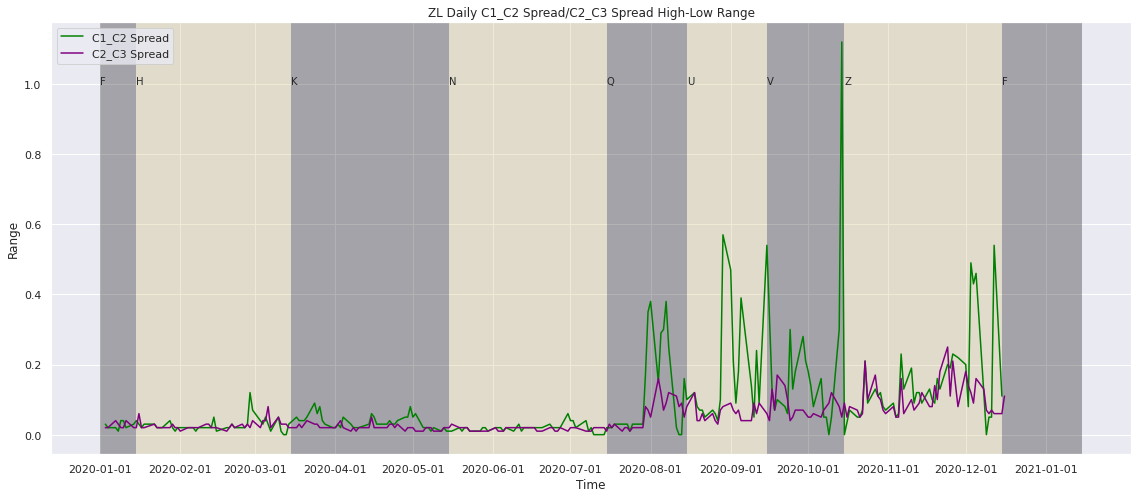

In [ ]:
loc = 1
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])
ax.plot(zl_1D.c1_c2_spread.index,(zl_1D.c1_c2_spread.High - zl_1D.c1_c2_spread.Low), color='green')
ax.plot(zl_1D.c2_c3_spread.index,(zl_1D.c2_c3_spread.High - zl_1D.c2_c3_spread.Low), color='purple')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
# ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3) # ZS
# ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y',alpha=0.3) # ZS
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-10-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-10-2020", '%d-%m-%Y'), datetime.strptime("15-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-12-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='black', alpha=0.3)
ax.set_xticks(["01-01-2020", "02-01-2020","03-01-2020","04-01-2020","05-01-2020","06-01-2020","07-01-2020","08-01-2020","09-01-2020","10-01-2020","11-01-2020","12-01-2020","01-01-2021"])

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'V')
# ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'X')#ZS
ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'Z')
# ax.text(datetime.strptime("15-11-2020", '%d-%m-%Y'),loc,'F')#ZS
ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')

ax.legend(['C1_C2 Spread','C2_C3 Spread'],loc='upper left')
ax.set_title('ZL Daily C1_C2 Spread/C2_C3 Spread High-Low Range')
ax.set_xlabel('Time')
ax.set_ylabel('Range')
plt.show()

In [ ]:
(zl_1D.c1_c2_spread.High-zl_1D.c1_c2_spread.Low).describe()

count    238.000000
mean       0.083908
std        0.125185
min        0.000000
25%        0.020000
50%        0.040000
75%        0.090000
max        1.120000
dtype: float64

In [ ]:
(zl_1D.c2_c3_spread.High-zl_1D.c2_c3_spread.Low).describe()

count    242.000000
mean       0.048471
std        0.043064
min        0.010000
25%        0.020000
50%        0.030000
75%        0.070000
max        0.250000
dtype: float64

ZS Butterfly

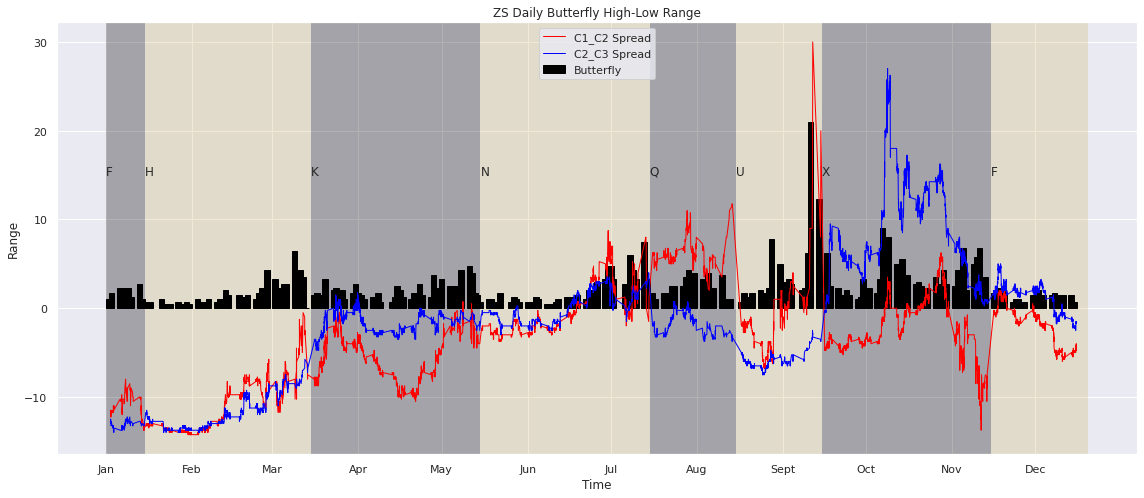

In [ ]:
c1c2 = zs_15.c1_c2_spread.Last
c2c3 = zs_15.c2_c3_spread.Last

d = {'c1c2':c1c2,
     'c2c3':c2c3}

new = pd.DataFrame(d)

new = new.dropna(how='any')
assert new.isnull().sum().any()==0

diff = new.c1c2 - new.c2c3

fly_range = diff.groupby([diff.index.date]).max() - diff.groupby([diff.index.date]).min()

loc = 15
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])

# ax1 = ax.twinx()
# ax.plot((s0).index,(s0), color='green', label='(C1_C2) Spread')
# ax.plot((s1).index,(s1), color='red', label='(C2_C3) Spread')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-11-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-11-2020", '%d-%m-%Y'), datetime.strptime("20-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y',alpha=0.3)
ax.set_xticks([datetime.strptime("01-01-2020", '%d-%m-%Y'),
               datetime.strptime("01-02-2020", '%d-%m-%Y'),
               datetime.strptime("01-03-2020", '%d-%m-%Y'),
               datetime.strptime("01-04-2020", '%d-%m-%Y'),
               datetime.strptime("01-05-2020", '%d-%m-%Y'),
               datetime.strptime("01-06-2020", '%d-%m-%Y'),
               datetime.strptime("01-07-2020", '%d-%m-%Y'),
               datetime.strptime("01-08-2020", '%d-%m-%Y'),
               datetime.strptime("01-09-2020", '%d-%m-%Y'),
               datetime.strptime("01-10-2020", '%d-%m-%Y'),
               datetime.strptime("01-11-2020", '%d-%m-%Y'),
               datetime.strptime("01-12-2020", '%d-%m-%Y')])

ax.set_xticklabels(['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

ax.bar((fly_range).index,(fly_range), color='black',label='Butterfly', width=2, edgecolor='black')

ax.plot(new.index, new.c1c2, color='red', label='C1_C2 Spread', linewidth=1)
ax.plot(new.index, new.c2c3, color='blue', label='C2_C3 Spread', linewidth=1)

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'X')
ax.text(datetime.strptime("15-11-2020", '%d-%m-%Y'),loc,'F')

ax.legend(loc='upper center')
ax.set_title('ZS Daily Butterfly High-Low Range')
ax.set_xlabel('Time')
ax.set_ylabel('Range')
plt.show()

In [ ]:
fly_range.describe()

count    239.000000
mean       2.320084
std        2.079829
min        0.000000
25%        1.000000
50%        1.750000
75%        2.750000
max       21.000000
dtype: float64

ZM Butterfly

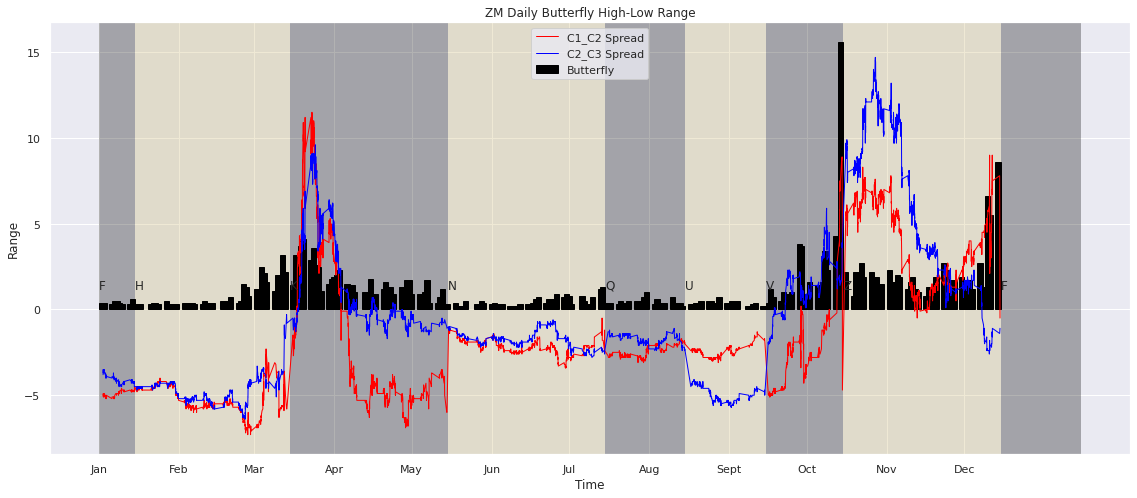

In [ ]:
c1c2 = zm_15.c1_c2_spread.Last
c2c3 = zm_15.c2_c3_spread.Last

d = {'c1c2':c1c2,
     'c2c3':c2c3}
new = pd.DataFrame(d)

new = new.dropna(how='any')
assert new.isnull().sum().any()==0

diff = new.c1c2 - new.c2c3

fly_range = diff.groupby([diff.index.date]).max() - diff.groupby([diff.index.date]).min()

loc = 1.2
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])

# ax1 = ax.twinx()
# ax.plot((s0).index,(s0), color='green', label='(C1_C2) Spread')
# ax.plot((s1).index,(s1), color='red', label='(C2_C3) Spread')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-10-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-10-2020", '%d-%m-%Y'), datetime.strptime("15-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-12-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='black', alpha=0.3)

ax.set_xticks([datetime.strptime("01-01-2020", '%d-%m-%Y'),
               datetime.strptime("01-02-2020", '%d-%m-%Y'),
               datetime.strptime("01-03-2020", '%d-%m-%Y'),
               datetime.strptime("01-04-2020", '%d-%m-%Y'),
               datetime.strptime("01-05-2020", '%d-%m-%Y'),
               datetime.strptime("01-06-2020", '%d-%m-%Y'),
               datetime.strptime("01-07-2020", '%d-%m-%Y'),
               datetime.strptime("01-08-2020", '%d-%m-%Y'),
               datetime.strptime("01-09-2020", '%d-%m-%Y'),
               datetime.strptime("01-10-2020", '%d-%m-%Y'),
               datetime.strptime("01-11-2020", '%d-%m-%Y'),
               datetime.strptime("01-12-2020", '%d-%m-%Y')])

ax.set_xticklabels(['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

ax.bar((fly_range).index,(fly_range), color='black',label='Butterfly', width=2, edgecolor='black')

ax.plot(new.index, new.c1c2, color='red', label='C1_C2 Spread', linewidth=1)
ax.plot(new.index, new.c2c3, color='blue', label='C2_C3 Spread', linewidth=1)


ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'V')
ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'Z')
ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')

ax.legend(loc='upper center')
ax.set_title('ZM Daily Butterfly High-Low Range')
ax.set_xlabel('Time')
ax.set_ylabel('Range')
plt.show()

In [ ]:
fly_range.describe()

count    238.00000
mean       1.14916
std        1.44271
min        0.10000
25%        0.40000
50%        0.70000
75%        1.50000
max       15.60000
dtype: float64

ZL Butterfly

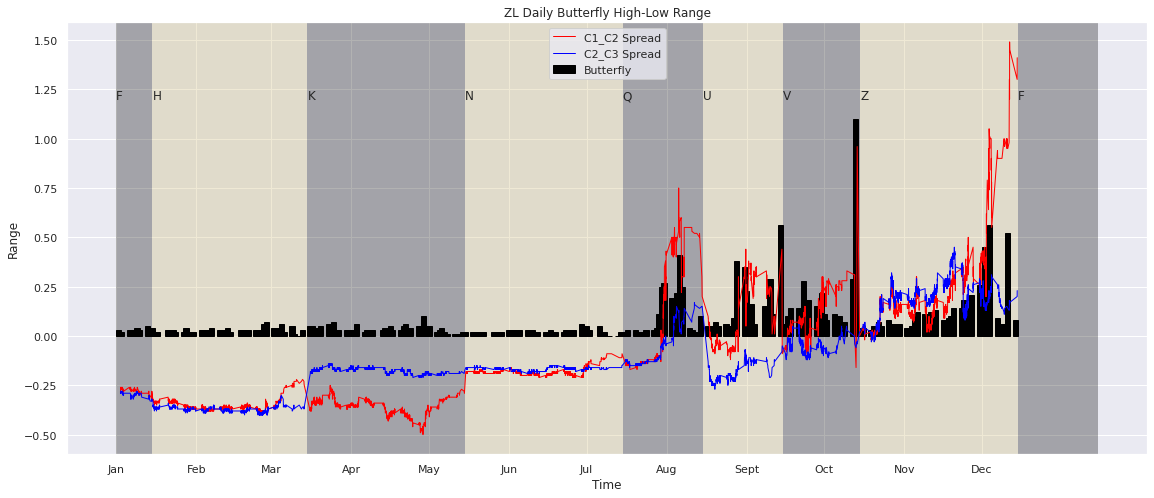

In [ ]:
c1c2 = zl_15.c1_c2_spread.Last
c2c3 = zl_15.c2_c3_spread.Last

d = {'c1c2':c1c2,
     'c2c3':c2c3}
new = pd.DataFrame(d)

new = new.dropna(how='any')
assert new.isnull().sum().any()==0

diff = new.c1c2 - new.c2c3

fly_range = diff.groupby([diff.index.date]).max() - diff.groupby([diff.index.date]).min()

loc = 1.2
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])

# ax1 = ax.twinx()
# ax.plot((s0).index,(s0), color='green', label='(C1_C2) Spread')
# ax.plot((s1).index,(s1), color='red', label='(C2_C3) Spread')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-10-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-10-2020", '%d-%m-%Y'), datetime.strptime("15-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-12-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='black', alpha=0.3)

ax.set_xticks([datetime.strptime("01-01-2020", '%d-%m-%Y'),
               datetime.strptime("01-02-2020", '%d-%m-%Y'),
               datetime.strptime("01-03-2020", '%d-%m-%Y'),
               datetime.strptime("01-04-2020", '%d-%m-%Y'),
               datetime.strptime("01-05-2020", '%d-%m-%Y'),
               datetime.strptime("01-06-2020", '%d-%m-%Y'),
               datetime.strptime("01-07-2020", '%d-%m-%Y'),
               datetime.strptime("01-08-2020", '%d-%m-%Y'),
               datetime.strptime("01-09-2020", '%d-%m-%Y'),
               datetime.strptime("01-10-2020", '%d-%m-%Y'),
               datetime.strptime("01-11-2020", '%d-%m-%Y'),
               datetime.strptime("01-12-2020", '%d-%m-%Y')])

ax.set_xticklabels(['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

ax.bar((fly_range).index,(fly_range), color='black',label='Butterfly', width=2, edgecolor='black')

ax.plot(new.index, new.c1c2, color='red', label='C1_C2 Spread', linewidth=1)
ax.plot(new.index, new.c2c3, color='blue', label='C2_C3 Spread', linewidth=1)


ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'V')
ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'Z')
ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')

ax.legend(loc='upper center')
ax.set_title('ZL Daily Butterfly High-Low Range')
ax.set_xlabel('Time')
ax.set_ylabel('Range')
plt.show()

In [ ]:
fly_range.describe()

count    238.000000
mean       0.076597
std        0.114042
min        0.000000
25%        0.030000
50%        0.040000
75%        0.077500
max        1.100000
dtype: float64

### **CORRELATIONS**

ZS RANGE

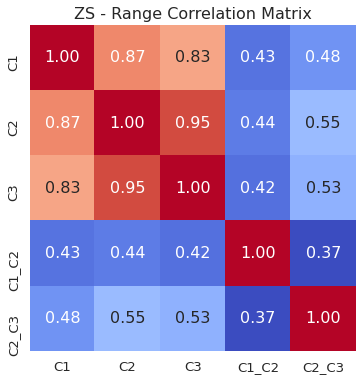

In [ ]:
c1_r = zs_15.c1.High - zs_15.c1.Low
c2_r = zs_15.c2.High - zs_15.c2.Low
c3_r = zs_15.c3.High - zs_15.c3.Low
c1_c2_r = zs_15.c1_c2_spread.High - zs_15.c1_c2_spread.Low
c2_c3_r = zs_15.c2_c3_spread.High - zs_15.c2_c3_spread.Low

frames = [c1_r, c2_r, c3_r, c1_c2_r, c2_c3_r]
zs_corr = pd.concat(frames, axis=1)
zs_corr.columns=['C1', 'C2', 'C3', 'C1_C2', 'C2_C3']

fig = plt.figure(figsize=[6,6])
sns.set(font_scale=1.2)
sns.heatmap(zs_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('ZS - Range Correlation Matrix', fontsize=16);
plt.show()

ZS VOL

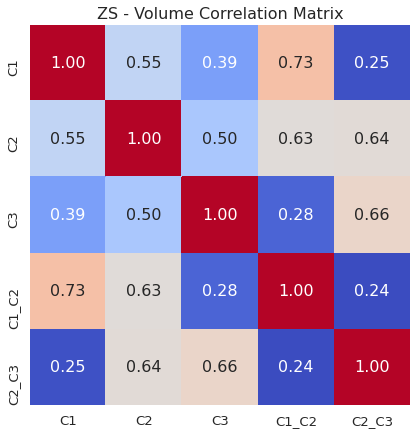

In [ ]:
c1_v = zs_15.c1.Volume
c2_v = zs_15.c2.Volume
c3_v = zs_15.c3.Volume
c1_c2_v = zs_15.c1_c2_spread.Volume
c2_c3_v = zs_15.c2_c3_spread.Volume

frames = [c1_v, c2_v, c3_v, c1_c2_v, c2_c3_v]
zs_corr = pd.concat(frames, axis=1)
zs_corr.columns=['C1', 'C2', 'C3', 'C1_C2', 'C2_C3']

fig = plt.figure(figsize=[7,7])
sns.set(font_scale=1.2)
sns.heatmap(zs_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('ZS - Volume Correlation Matrix', fontsize=16);
plt.show()

ZM RANGE

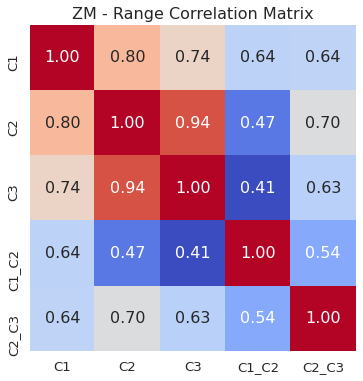

In [ ]:
c1_r = zm_15.c1.High - zm_15.c1.Low
c2_r = zm_15.c2.High - zm_15.c2.Low
c3_r = zm_15.c3.High - zm_15.c3.Low
c1_c2_r = zm_15.c1_c2_spread.High - zm_15.c1_c2_spread.Low
c2_c3_r = zm_15.c2_c3_spread.High - zm_15.c2_c3_spread.Low

frames = [c1_r, c2_r, c3_r, c1_c2_r, c2_c3_r]
zm_corr = pd.concat(frames, axis=1)
zm_corr.columns=['C1', 'C2', 'C3', 'C1_C2', 'C2_C3']

fig = plt.figure(figsize=[6,6])
sns.set(font_scale=1.2)
sns.heatmap(zm_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('ZM - Range Correlation Matrix', fontsize=16);
plt.show()

ZM VOL

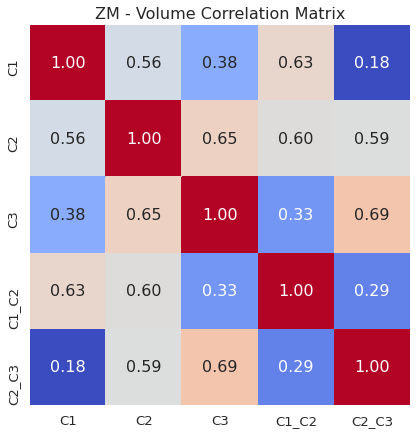

In [ ]:
c1_v = zm_15.c1.Volume
c2_v = zm_15.c2.Volume
c3_v = zm_15.c3.Volume
c1_c2_v = zm_15.c1_c2_spread.Volume
c2_c3_v = zm_15.c2_c3_spread.Volume

frames = [c1_v, c2_v, c3_v, c1_c2_v, c2_c3_v]
zm_corr = pd.concat(frames, axis=1)
zm_corr.columns=['C1', 'C2', 'C3', 'C1_C2', 'C2_C3']

fig = plt.figure(figsize=[7,7])
sns.set(font_scale=1.2)
sns.heatmap(zm_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('ZM - Volume Correlation Matrix', fontsize=16);
plt.show()

ZL RANGE

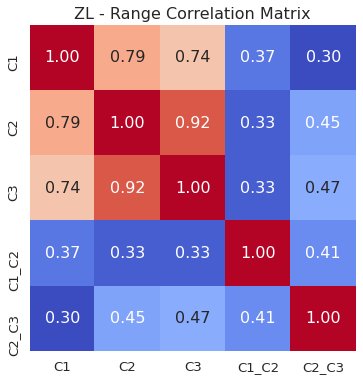

In [ ]:
c1_r = zl_15.c1.High - zl_15.c1.Low
c2_r = zl_15.c2.High - zl_15.c2.Low
c3_r = zl_15.c3.High - zl_15.c3.Low
c1_c2_r = zl_15.c1_c2_spread.High - zl_15.c1_c2_spread.Low
c2_c3_r = zl_15.c2_c3_spread.High - zl_15.c2_c3_spread.Low

frames = [c1_r, c2_r, c3_r, c1_c2_r, c2_c3_r]
zl_corr = pd.concat(frames, axis=1)
zl_corr.columns=['C1', 'C2', 'C3', 'C1_C2', 'C2_C3']

fig = plt.figure(figsize=[6,6])
sns.set(font_scale=1.2)
sns.heatmap(zl_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('ZL - Range Correlation Matrix', fontsize=16);
plt.show()

ZL VOL

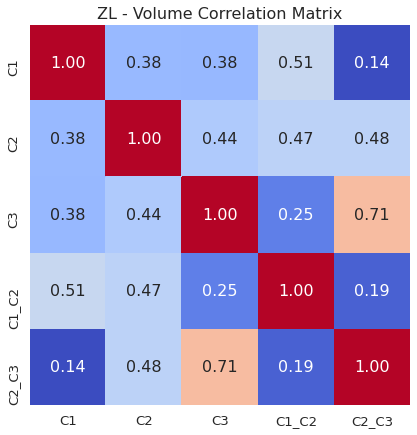

In [ ]:
c1_v = zl_15.c1.Volume
c2_v = zl_15.c2.Volume
c3_v = zl_15.c3.Volume
c1_c2_v = zl_15.c1_c2_spread.Volume
c2_c3_v = zl_15.c2_c3_spread.Volume

frames = [c1_v, c2_v, c3_v, c1_c2_v, c2_c3_v]
zl_corr = pd.concat(frames, axis=1)
zl_corr.columns=['C1', 'C2', 'C3', 'C1_C2', 'C2_C3']

fig = plt.figure(figsize=[7,7])
sns.set(font_scale=1.2)
sns.heatmap(zl_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('ZL - Volume Correlation Matrix', fontsize=16);
plt.show()

C1 ZS-ZM-ZL RANGE

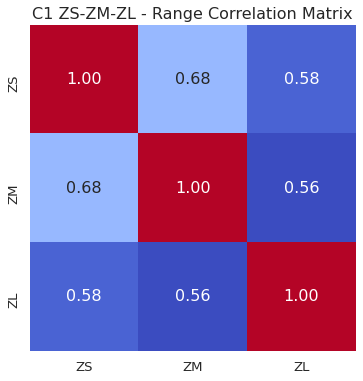

In [ ]:
c_zs = zs_15.c1.High - zs_15.c1.Low
c_zm = zm_15.c1.High - zm_15.c1.Low
c_zl = zl_15.c1.High - zl_15.c1.Low
# c1_c2_r = zl_15.c1_c2_spread.High - zl_15.c1_c2_spread.Low
# c2_c3_r = zl_15.c2_c3_spread.High - zl_15.c2_c3_spread.Low

frames = [c_zs, c_zm, c_zl]
c_corr = pd.concat(frames, axis=1)
c_corr.columns=['ZS', 'ZM', 'ZL']

fig = plt.figure(figsize=[6,6])
sns.set(font_scale=1.2)
sns.heatmap(c_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('C1 ZS-ZM-ZL - Range Correlation Matrix', fontsize=16);
plt.show()

C1 ZS-ZM-ZL VOL

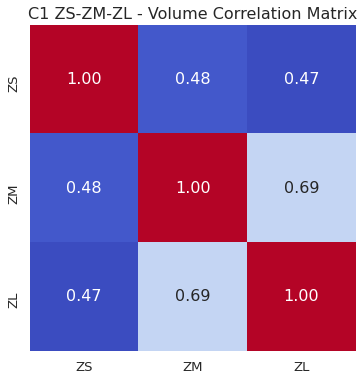

In [ ]:
c_zs = zs_15.c1.Volume
c_zm = zm_15.c1.Volume
c_zl = zl_15.c1.Volume


frames = [c_zs, c_zm, c_zl]
c_corr = pd.concat(frames, axis=1)
c_corr.columns=['ZS', 'ZM', 'ZL']

fig = plt.figure(figsize=[6,6])
sns.set(font_scale=1.2)
sns.heatmap(c_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('C1 ZS-ZM-ZL - Volume Correlation Matrix', fontsize=16);
plt.show()

C2 ZS-ZM-ZL RANGE

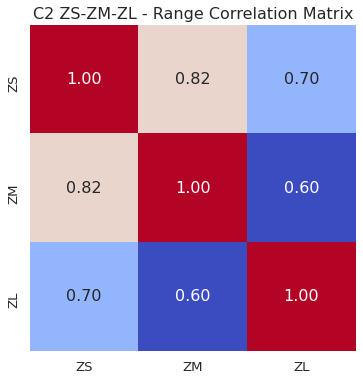

In [ ]:
c_zs = zs_15.c2.High - zs_15.c2.Low
c_zm = zm_15.c2.High - zm_15.c2.Low
c_zl = zl_15.c2.High - zl_15.c2.Low
# c1_c2_r = zl_15.c1_c2_spread.High - zl_15.c1_c2_spread.Low
# c2_c3_r = zl_15.c2_c3_spread.High - zl_15.c2_c3_spread.Low

frames = [c_zs, c_zm, c_zl]
c_corr = pd.concat(frames, axis=1)
c_corr.columns=['ZS', 'ZM', 'ZL']

fig = plt.figure(figsize=[6,6])
sns.set(font_scale=1.2)
sns.heatmap(c_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('C2 ZS-ZM-ZL - Range Correlation Matrix', fontsize=16);
plt.show()

C2 ZS-ZM-ZL VOL

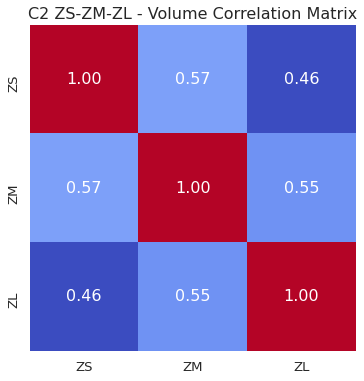

In [ ]:
c_zs = zs_15.c2.Volume
c_zm = zm_15.c2.Volume
c_zl = zl_15.c2.Volume


frames = [c_zs, c_zm, c_zl]
c_corr = pd.concat(frames, axis=1)
c_corr.columns=['ZS', 'ZM', 'ZL']

fig = plt.figure(figsize=[6,6])
sns.set(font_scale=1.2)
sns.heatmap(c_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('C2 ZS-ZM-ZL - Volume Correlation Matrix', fontsize=16);
plt.show()

C3 ZS-ZM-ZL RANGE

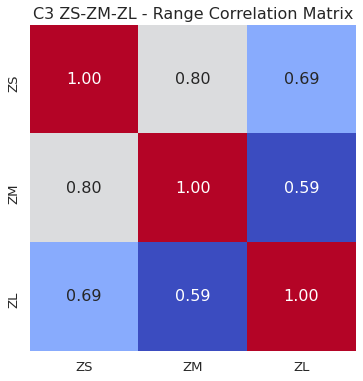

In [ ]:
c_zs = zs_15.c3.High - zs_15.c3.Low
c_zm = zm_15.c3.High - zm_15.c3.Low
c_zl = zl_15.c3.High - zl_15.c3.Low
# c1_c2_r = zl_15.c1_c2_spread.High - zl_15.c1_c2_spread.Low
# c2_c3_r = zl_15.c2_c3_spread.High - zl_15.c2_c3_spread.Low

frames = [c_zs, c_zm, c_zl]
c_corr = pd.concat(frames, axis=1)
c_corr.columns=['ZS', 'ZM', 'ZL']

fig = plt.figure(figsize=[6,6])
sns.set(font_scale=1.2)
sns.heatmap(c_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('C3 ZS-ZM-ZL - Range Correlation Matrix', fontsize=16);
plt.show()

C3 ZS-ZM-ZL VOL

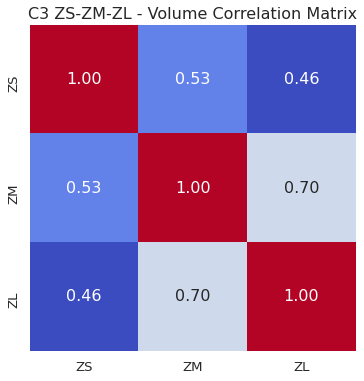

In [ ]:
c_zs = zs_15.c3.Volume
c_zm = zm_15.c3.Volume
c_zl = zl_15.c3.Volume


frames = [c_zs, c_zm, c_zl]
c_corr = pd.concat(frames, axis=1)
c_corr.columns=['ZS', 'ZM', 'ZL']

fig = plt.figure(figsize=[6,6])
sns.set(font_scale=1.2)
sns.heatmap(c_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('C3 ZS-ZM-ZL - Volume Correlation Matrix', fontsize=16);
plt.show()

ZS RANGE-VOLUME

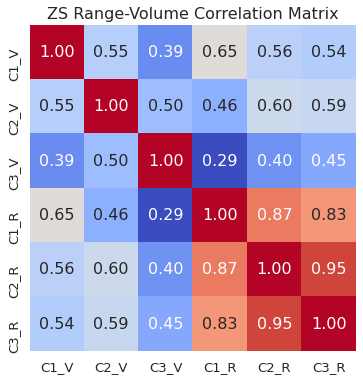

In [ ]:
c1_v = zs_15.c1.Volume
c2_v = zs_15.c2.Volume
c3_v = zs_15.c3.Volume

c1_r = zs_15.c1.High - zs_15.c1.Low
c2_r = zs_15.c2.High - zs_15.c2.Low
c3_r = zs_15.c3.High - zs_15.c3.Low

frames = [c1_v, c2_v, c3_v, c1_r, c2_r, c3_r]
c_corr = pd.concat(frames, axis=1)
c_corr.columns=['C1_V', 'C2_V', 'C3_V', 'C1_R', 'C2_R', 'C3_R']

fig = plt.figure(figsize=[6,6])
sns.set(font_scale=1.2)
sns.heatmap(c_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('ZS Range-Volume Correlation Matrix', fontsize=16);
plt.show()

ZM RANGE-VOLUME

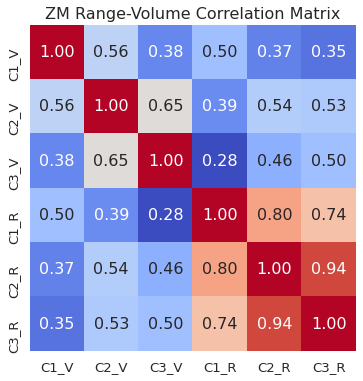

In [ ]:
c1_v = zm_15.c1.Volume
c2_v = zm_15.c2.Volume
c3_v = zm_15.c3.Volume

c1_r = zm_15.c1.High - zm_15.c1.Low
c2_r = zm_15.c2.High - zm_15.c2.Low
c3_r = zm_15.c3.High - zm_15.c3.Low

frames = [c1_v, c2_v, c3_v, c1_r, c2_r, c3_r]
c_corr = pd.concat(frames, axis=1)
c_corr.columns=['C1_V', 'C2_V', 'C3_V', 'C1_R', 'C2_R', 'C3_R']

fig = plt.figure(figsize=[6,6])
sns.set(font_scale=1.2)
sns.heatmap(c_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('ZM Range-Volume Correlation Matrix', fontsize=16);
plt.show()

ZL RANGE-VOLUME

In [ ]:
c1_v = zl_15.c1.Volume
c2_v = zl_15.c2.Volume
c3_v = zl_15.c3.Volume

c1_r = zl_15.c1.High - zl_15.c1.Low
c2_r = zl_15.c2.High - zl_15.c2.Low
c3_r = zl_15.c3.High - zl_15.c3.Low

frames = [c1_v, c2_v, c3_v, c1_r, c2_r, c3_r]
c_corr = pd.concat(frames, axis=1)
c_corr.columns=['C1_V', 'C2_V', 'C3_V', 'C1_R', 'C2_R', 'C3_R']

fig = plt.figure(figsize=[6,6])
sns.set(font_scale=1.2)
sns.heatmap(c_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('ZL Range-Volume Correlation Matrix', fontsize=16);
plt.show()

In [ ]:
d = {'RNG':zs_r.groupby([(zs_r.index.month),(zs_r.index.hour)]).mean().values,
     'VOL':zs_vol.groupby([(zs_vol.index.month),(zs_vol.index.hour)]).mean().values}
zs_corr = pd.DataFrame(d)

fig = plt.figure(figsize=[6,6])
sns.set(font_scale=1.2)
sns.heatmap(zs_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('ZS - Range- Volume (Hourly Variation Every Month) Correlation Matrix', fontsize=16);
plt.show()

In [ ]:
d = {'RNG':zm_r.groupby([(zm_r.index.month),(zm_r.index.hour)]).mean().values,
     'VOL':zm_vol.groupby([(zm_vol.index.month),(zm_vol.index.hour)]).mean().values}
zm_corr = pd.DataFrame(d)

fig = plt.figure(figsize=[6,6])
sns.set(font_scale=1.2)
sns.heatmap(zm_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('ZM - Range- Volume (Hourly Variation Every Month) Correlation Matrix', fontsize=16);
plt.show()

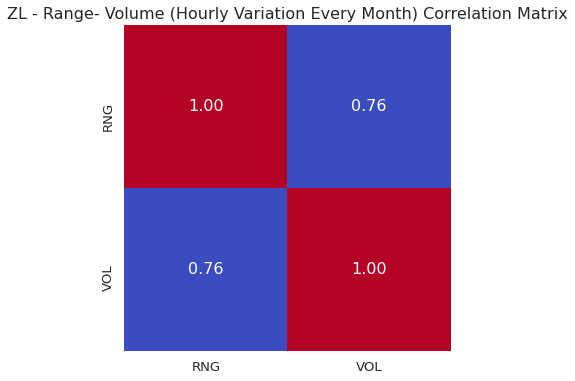

In [ ]:
d = {'RNG':zl_r.groupby([(zl_r.index.month),(zl_r.index.hour)]).mean().values,
     'VOL':zl_vol.groupby([(zl_vol.index.month),(zl_vol.index.hour)]).mean().values}
zl_corr = pd.DataFrame(d)

fig = plt.figure(figsize=[6,6])
sns.set(font_scale=1.2)
sns.heatmap(zl_corr.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('ZL - Range- Volume (Hourly Variation Every Month) Correlation Matrix', fontsize=16);
plt.show()

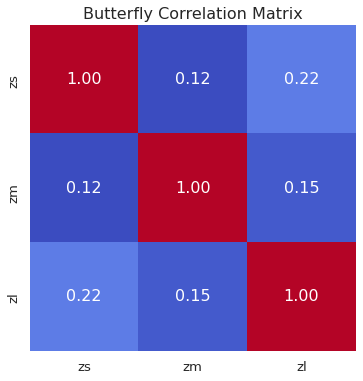

In [ ]:
zs_c1c2 = zs_15.c1_c2_spread.Last
zs_c2c3 = zs_15.c2_c3_spread.Last

zm_c1c2 = zm_15.c1_c2_spread.Last
zm_c2c3 = zm_15.c2_c3_spread.Last

zl_c1c2 = zl_15.c1_c2_spread.Last
zl_c2c3 = zl_15.c2_c3_spread.Last

zs_d = {'c1c2':zs_c1c2,
     'c2c3':zs_c2c3}

zm_d = {'c1c2':zm_c1c2,
     'c2c3':zm_c2c3}

zl_d = {'c1c2':zl_c1c2,
     'c2c3':zl_c2c3}

zs_new = pd.DataFrame(zs_d).dropna(how='any')
assert zs_new.isnull().sum().any()==0

zm_new = pd.DataFrame(zm_d).dropna(how='any')
assert zm_new.isnull().sum().any()==0

zl_new = pd.DataFrame(zl_d).dropna(how='any')
assert zl_new.isnull().sum().any()==0


s_diff = zs_new.c1c2 - zs_new.c2c3
m_diff = zm_new.c1c2 - zm_new.c2c3
l_diff = zl_new.c1c2 - zl_new.c2c3

s_fly = s_diff.groupby([s_diff.index.date]).max() - s_diff.groupby([s_diff.index.date]).min()
m_fly = m_diff.groupby([m_diff.index.date]).max() - m_diff.groupby([m_diff.index.date]).min()
l_fly = l_diff.groupby([l_diff.index.date]).max() - l_diff.groupby([l_diff.index.date]).min()


final = {'zs':s_fly,
     'zm':m_fly,
     'zl':l_fly}

final = pd.DataFrame(final).dropna(how='any')
assert final.isnull().sum().any()==0

fig = plt.figure(figsize=[6,6])
sns.set(font_scale=1.2)
sns.heatmap(final.corr(),cmap='coolwarm',annot=True,fmt='.2f',square=True,annot_kws={'size':16}, cbar=False)
plt.title('Butterfly Correlation Matrix', fontsize=16);
plt.show()

### **Volume Analysis**

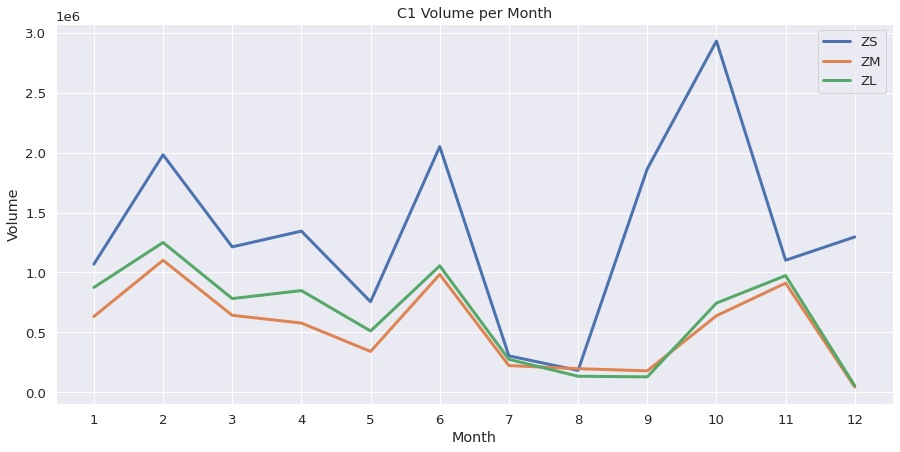

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,7))

zs_60.c1.Volume.groupby(zs_60.c1.index.month).sum().plot(linewidth=3, label ='ZS')
zm_60.c1.Volume.groupby(zm_60.c1.index.month).sum().plot(linewidth=3, label ='ZM')
zl_60.c1.Volume.groupby(zl_60.c1.index.month).sum().plot(linewidth=3, label ='ZL')

# zs_60.c2.Volume.groupby(zs_60.c2.index.dayofweek).mean().plot()
# zm_60.c2.Volume.groupby(zm_60.c2.index.dayofweek).mean().plot()
# zl_60.c2.Volume.groupby(zl_60.c2.index.dayofweek).mean().plot()

# zs_60.c3.Volume.groupby(zs_60.c3.index.dayofweek).mean().plot()
# zm_60.c3.Volume.groupby(zm_60.c3.index.dayofweek).mean().plot()
# zl_60.c3.Volume.groupby(zl_60.c3.index.dayofweek).mean().plot()

# zs_60.c1_c2_spread.Volume.groupby(zs_60.c1_c2_spread.index.dayofweek).mean().plot()
# zm_60.c1_c2_spread.Volume.groupby(zm_60.c1_c2_spread.index.dayofweek).mean().plot()
# zl_60.c1_c2_spread.Volume.groupby(zl_60.c1_c2_spread.index.dayofweek).mean().plot()

# zs_60.c2_c3_spread.Volume.groupby(zs_60.c2_c3_spread.index.dayofweek).mean().plot()
# zm_60.c2_c3_spread.Volume.groupby(zm_60.c2_c3_spread.index.dayofweek).mean().plot()
# zl_60.c2_c3_spread.Volume.groupby(zl_60.c2_c3_spread.index.dayofweek).mean().plot()

ax.legend()
ax.set_xticks(range(1,13))
ax.set_ylabel('Volume')
ax.set_xlabel('Month')
ax.set_title('C1 Volume per Month')
plt.show()

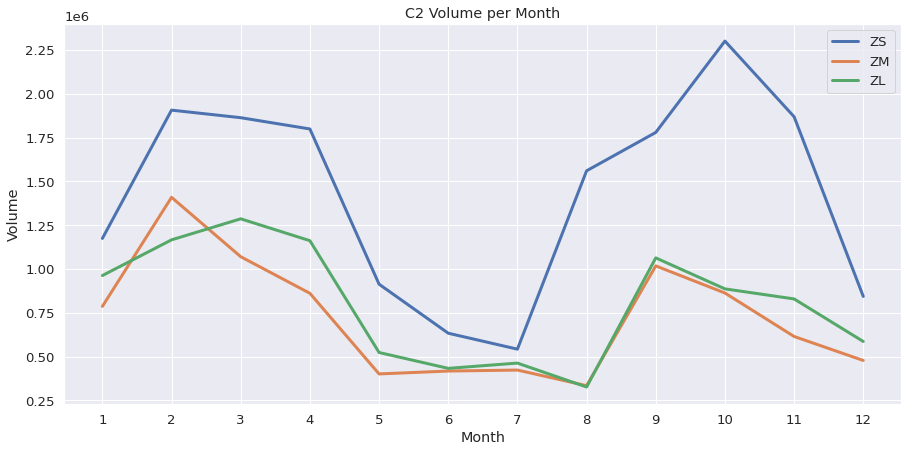

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,7))

zs_60.c2.Volume.groupby(zs_60.c2.index.month).sum().plot(linewidth=3, label ='ZS')
zm_60.c2.Volume.groupby(zm_60.c2.index.month).sum().plot(linewidth=3, label ='ZM')
zl_60.c2.Volume.groupby(zl_60.c2.index.month).sum().plot(linewidth=3, label ='ZL')

ax.legend()
ax.set_xticks(range(1,13))
ax.set_ylabel('Volume')
ax.set_xlabel('Month')
ax.set_title('C2 Volume per Month')
plt.show()

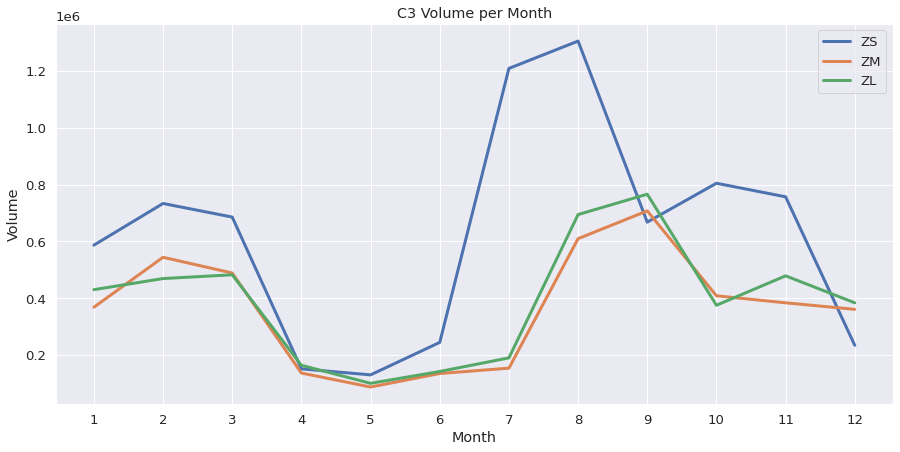

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,7))

zs_60.c3.Volume.groupby(zs_60.c3.index.month).sum().plot(linewidth=3, label ='ZS')
zm_60.c3.Volume.groupby(zm_60.c3.index.month).sum().plot(linewidth=3, label ='ZM')
zl_60.c3.Volume.groupby(zl_60.c3.index.month).sum().plot(linewidth=3, label ='ZL')

ax.legend()
ax.set_xticks(range(1,13))
ax.set_ylabel('Volume')
ax.set_xlabel('Month')
ax.set_title('C3 Volume per Month')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,7))

zs_60.c1_c2_spread.Volume.groupby(zs_60.c1_c2_spread.index.month).sum().plot(style='-o', linewidth=2, label ='C1_C2', color='red')
zs_60.c2_c3_spread.Volume.groupby(zs_60.c2_c3_spread.index.month).sum().plot(style='-o', linewidth=2, label ='C2_C3', color='green')

ax.legend()
ax.set_xticks(range(1,13))
ax.set_ylabel('Volume')
ax.set_xlabel('Month')
ax.set_title('ZS Spread Volume per Month')
plt.show()

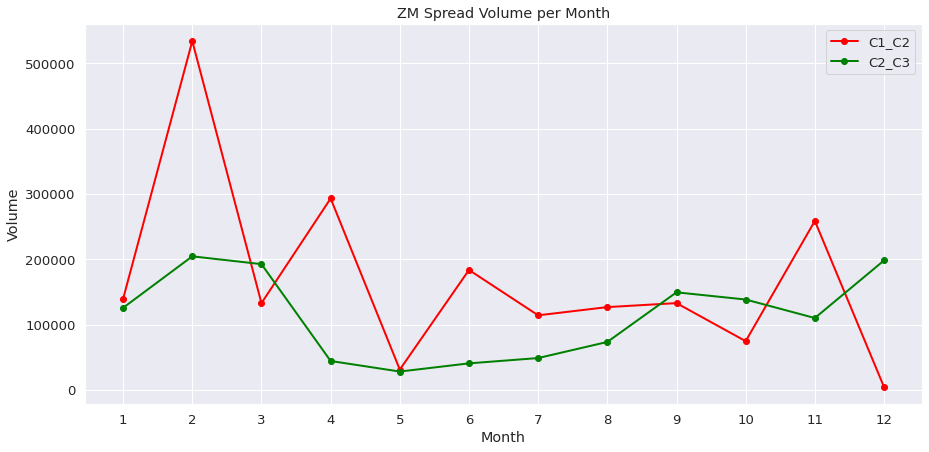

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,7))

zm_60.c1_c2_spread.Volume.groupby(zm_60.c1_c2_spread.index.month).sum().plot(style='-o', linewidth=2, label ='C1_C2', color='red')
zm_60.c2_c3_spread.Volume.groupby(zm_60.c2_c3_spread.index.month).sum().plot(style='-o', linewidth=2, label ='C2_C3', color='green')

ax.legend()
ax.set_xticks(range(1,13))
ax.set_ylabel('Volume')
ax.set_xlabel('Month')
ax.set_title('ZM Spread Volume per Month')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,7))

zl_60.c1_c2_spread.Volume.groupby(zl_60.c1_c2_spread.index.month).sum().plot(style='-o', linewidth=2, label ='C1_C2', color='red')
zl_60.c2_c3_spread.Volume.groupby(zl_60.c2_c3_spread.index.month).sum().plot(style='-o', linewidth=2, label ='C2_C3', color='green')

ax.legend()
ax.set_xticks(range(1,13))
ax.set_ylabel('Volume')
ax.set_xlabel('Month')
ax.set_title('ZL Spread Volume per Month')
plt.show()

Text(0.5, 1.0, 'ZM Volume Spikes')

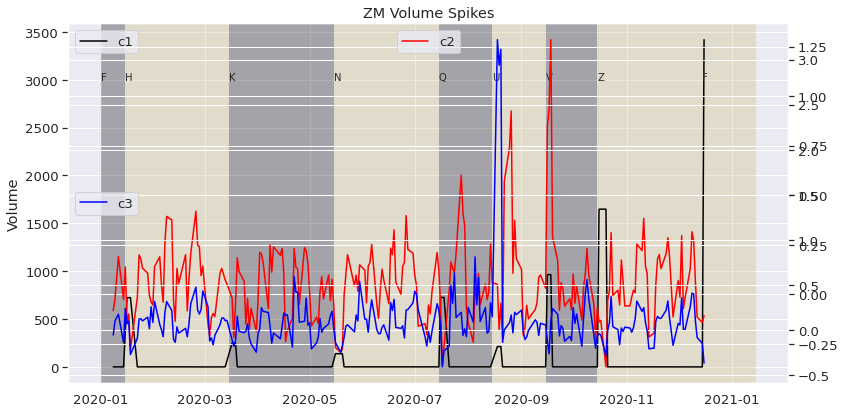

In [ ]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_axes([0,0,1,1])

ax1=ax.twinx()
ax2=ax.twinx()
loc=3000

ax.plot(zm_1D.c1.Volume.pct_change().dropna().rolling(3).mean(), color='black', label='c1')
ax1.plot(zm_1D.c2.Volume.pct_change().dropna().rolling(3).mean(), color='red', label='c2')
ax2.plot(zm_1D.c3.Volume.pct_change().dropna().rolling(3).mean(), color='blue', label='c3')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-10-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-10-2020", '%d-%m-%Y'), datetime.strptime("15-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-12-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'V')
ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'Z')
ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')
ax.legend(loc='upper left')
ax1.legend(loc='upper center')
ax2.legend(loc='center left')
ax.set_ylabel('Volume')
ax.set_title('ZM Volume Spikes')

Text(0.5, 1.0, 'ZL Volume Spikes')

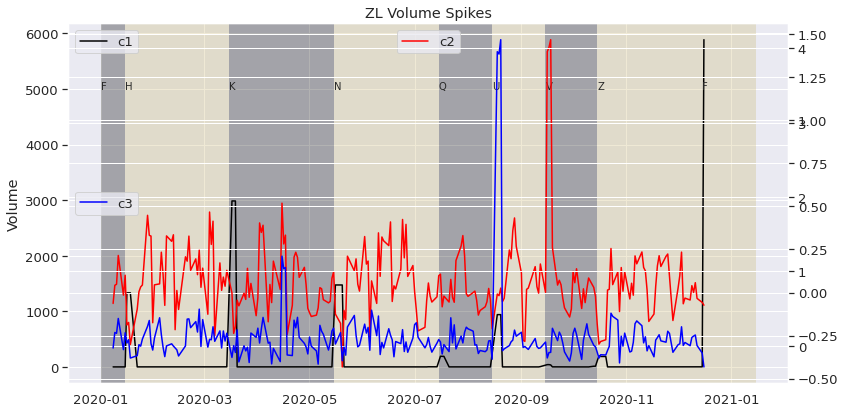

In [ ]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_axes([0,0,1,1])

ax1=ax.twinx()
ax2=ax.twinx()
loc=5000

ax.plot(zl_1D.c1.Volume.pct_change().dropna().rolling(3).mean(), color='black', label='c1')
ax1.plot(zl_1D.c2.Volume.pct_change().dropna().rolling(3).mean(), color='red', label='c2')
ax2.plot(zl_1D.c3.Volume.pct_change().dropna().rolling(3).mean(), color='blue', label='c3')

ax.axvspan(datetime.strptime("01-01-2020", '%d-%m-%Y'), datetime.strptime("15-01-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-01-2020", '%d-%m-%Y'), datetime.strptime("15-03-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-03-2020", '%d-%m-%Y'), datetime.strptime("15-05-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-05-2020", '%d-%m-%Y'), datetime.strptime("15-07-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-07-2020", '%d-%m-%Y'), datetime.strptime("15-08-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-08-2020", '%d-%m-%Y'), datetime.strptime("15-09-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-09-2020", '%d-%m-%Y'), datetime.strptime("15-10-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='black',alpha=0.3)
ax.axvspan(datetime.strptime("15-10-2020", '%d-%m-%Y'), datetime.strptime("15-12-2020", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)
ax.axvspan(datetime.strptime("15-12-2020", '%d-%m-%Y'), datetime.strptime("15-01-2021", '%d-%m-%Y'), fill=True, linewidth=0, color='y', alpha=0.3)

ax.text(datetime.strptime("01-01-2020", '%d-%m-%Y'),loc,'F')
ax.text(datetime.strptime("15-01-2020", '%d-%m-%Y'),loc,'H')
ax.text(datetime.strptime("15-03-2020", '%d-%m-%Y'),loc,'K')
ax.text(datetime.strptime("15-05-2020", '%d-%m-%Y'),loc,'N')
ax.text(datetime.strptime("15-07-2020", '%d-%m-%Y'),loc,'Q')
ax.text(datetime.strptime("15-08-2020", '%d-%m-%Y'),loc,'U')
ax.text(datetime.strptime("15-09-2020", '%d-%m-%Y'),loc,'V')
ax.text(datetime.strptime("15-10-2020", '%d-%m-%Y'),loc,'Z')
ax.text(datetime.strptime("15-12-2020", '%d-%m-%Y'),loc,'F')
ax.legend(loc='upper left')
ax1.legend(loc='upper center')
ax2.legend(loc='center left')
ax.set_ylabel('Volume')
ax.set_title('ZL Volume Spikes')